**Made by - Rishabh Gupta**

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
from datetime import datetime  # Correct import

# Example usage
now = datetime.now()
print(now)


# data visualization
import matplotlib.pyplot as plt
import matplotlib.style

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import metrics #model performance metrics
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

2025-02-22 17:46:45.314892


In [2]:
data_sparkling = pd.read_csv('C:/Users/risha/Downloads/Sparkling.csv')

In [3]:
df = data_sparkling.copy()

In [4]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [5]:
df.shape

(187, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [7]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [8]:
df[df.duplicated()].count()

YearMonth    0
Sparkling    0
dtype: int64

In [9]:
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [10]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')  # Adjust format if needed
df['Year'] = df['YearMonth'].dt.year
df['Month'] = df['YearMonth'].dt.month

df.head()


YearMonth  Sparkling  Year  Month
0 1980-01-01       1686  1980      1
1 1980-02-01       1591  1980      2
2 1980-03-01       2304  1980      3
3 1980-04-01       1712  1980      4
4 1980-05-01       1471  1980      5

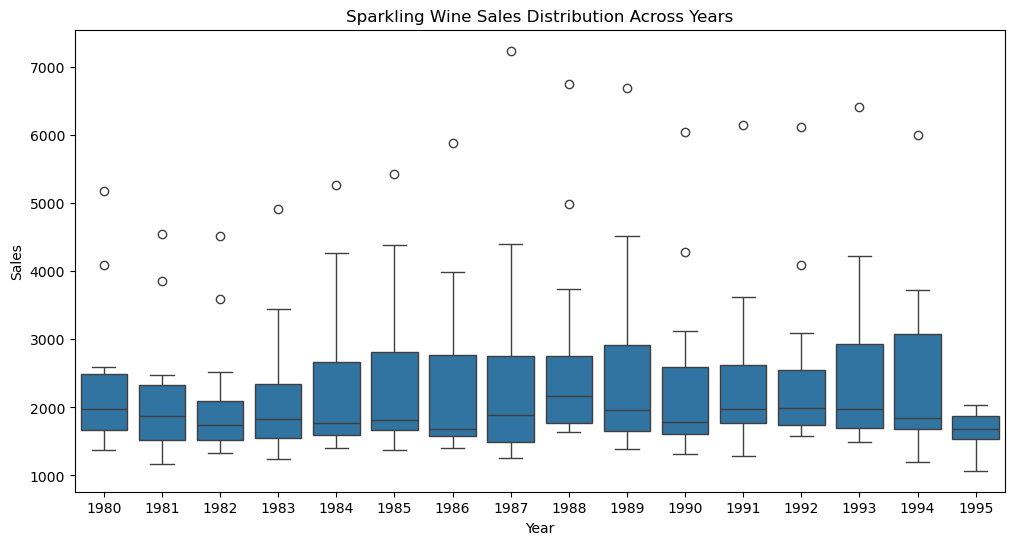

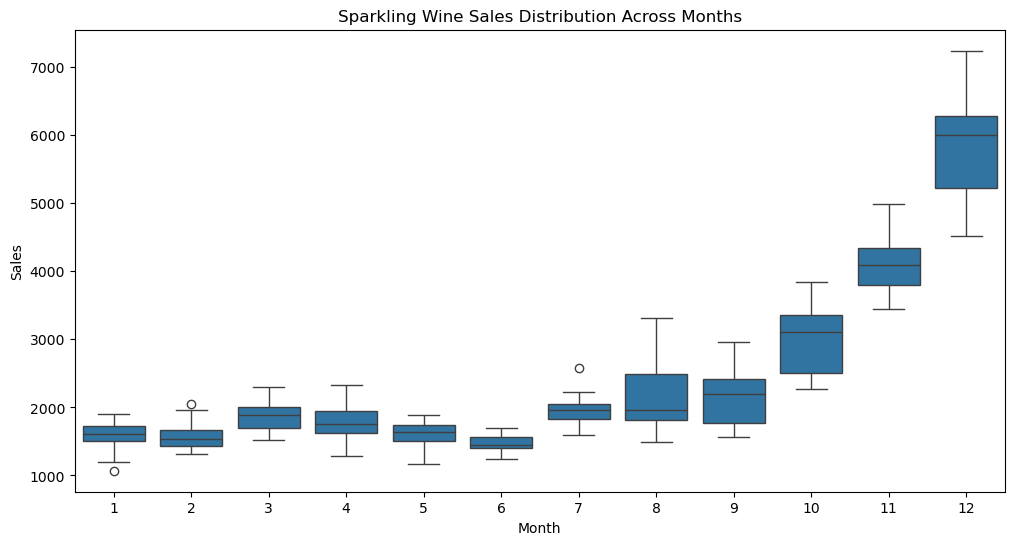

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'YearMonth', 'Sparkling', 'Year', and 'Month'

# Boxplot for sales across different years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Sparkling', data=df)  # Corrected: y='Sparkling'
plt.title('Sparkling Wine Sales Distribution Across Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Boxplot for sales within different months across years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sparkling', data=df)  # Corrected: y='Sparkling'
plt.title('Sparkling Wine Sales Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

<Axes: >

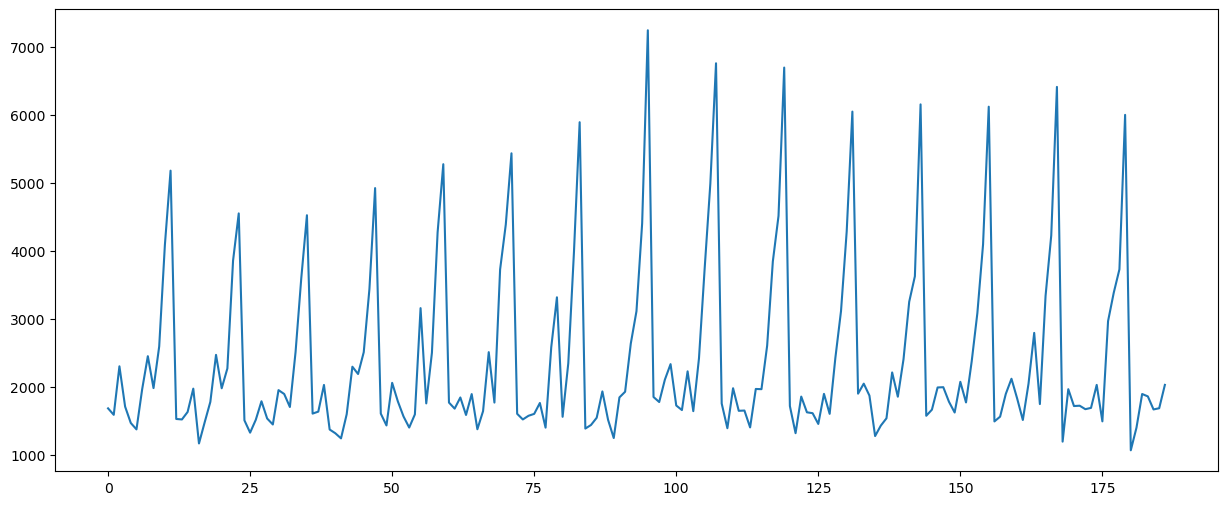

In [12]:
plt.figure(figsize=(15,6))
df['Sparkling'].plot()

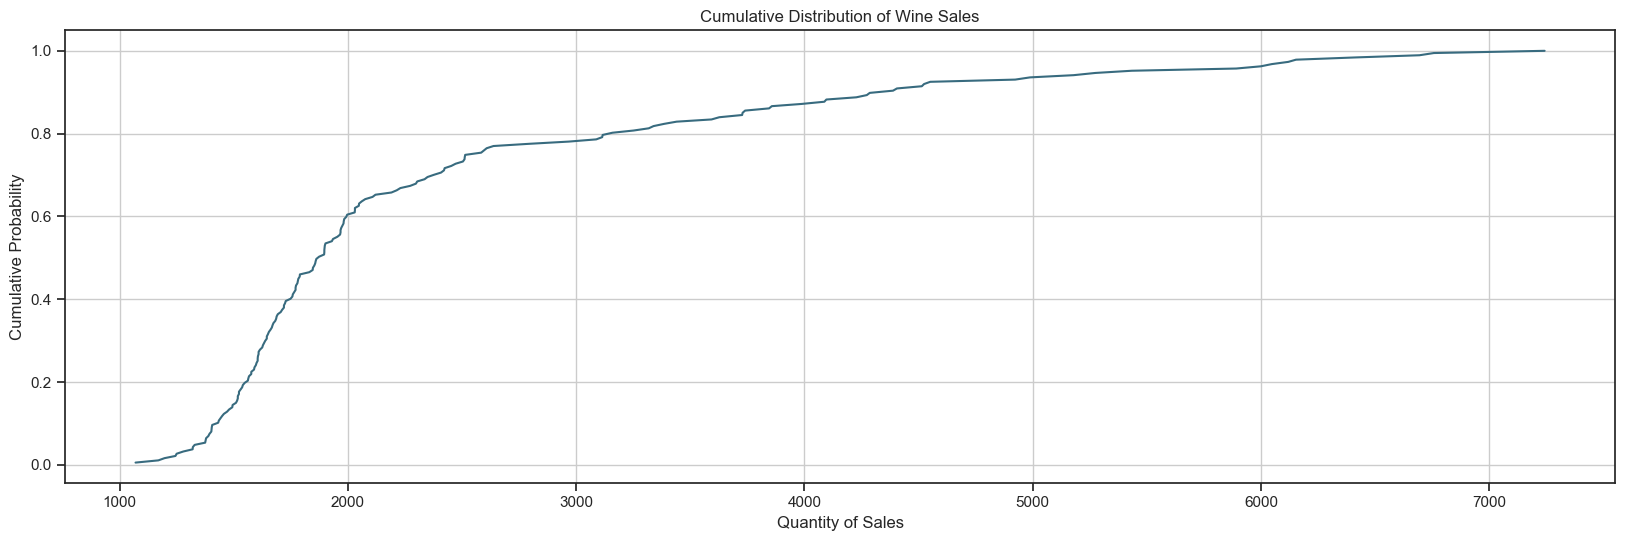

In [13]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (20, 20))


plt.subplot(312)
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.title('Cumulative Distribution of Wine Sales')
plt.xlabel('Quantity of Sales');
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [14]:
print(df.dtypes)

YearMonth    datetime64[ns]
Sparkling             int64
Year                  int32
Month                 int32
dtype: object


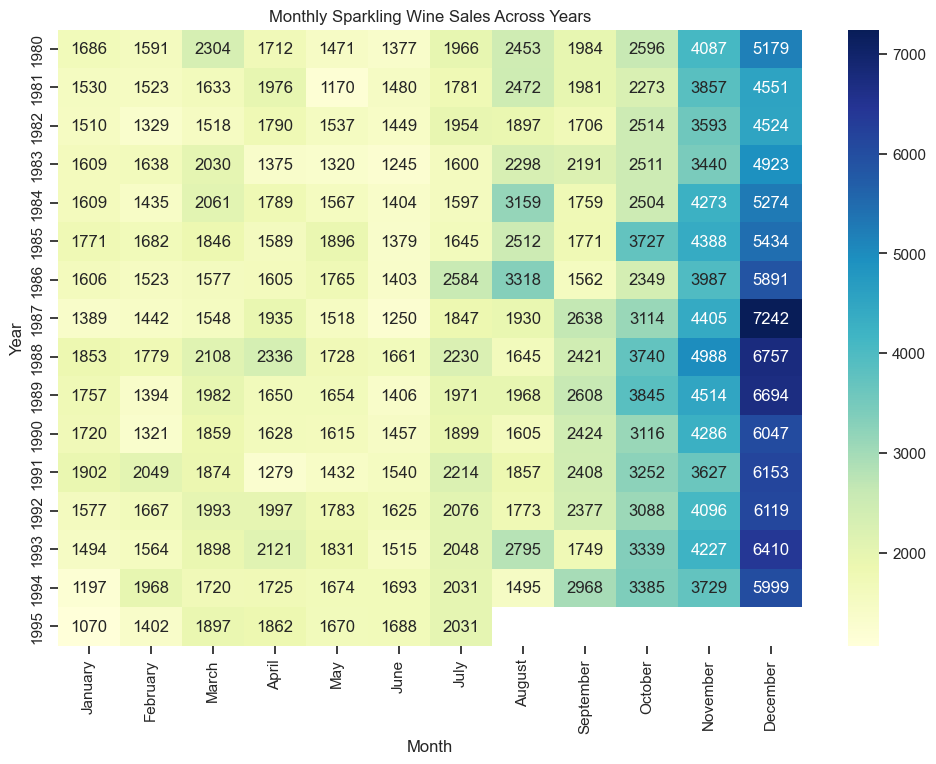

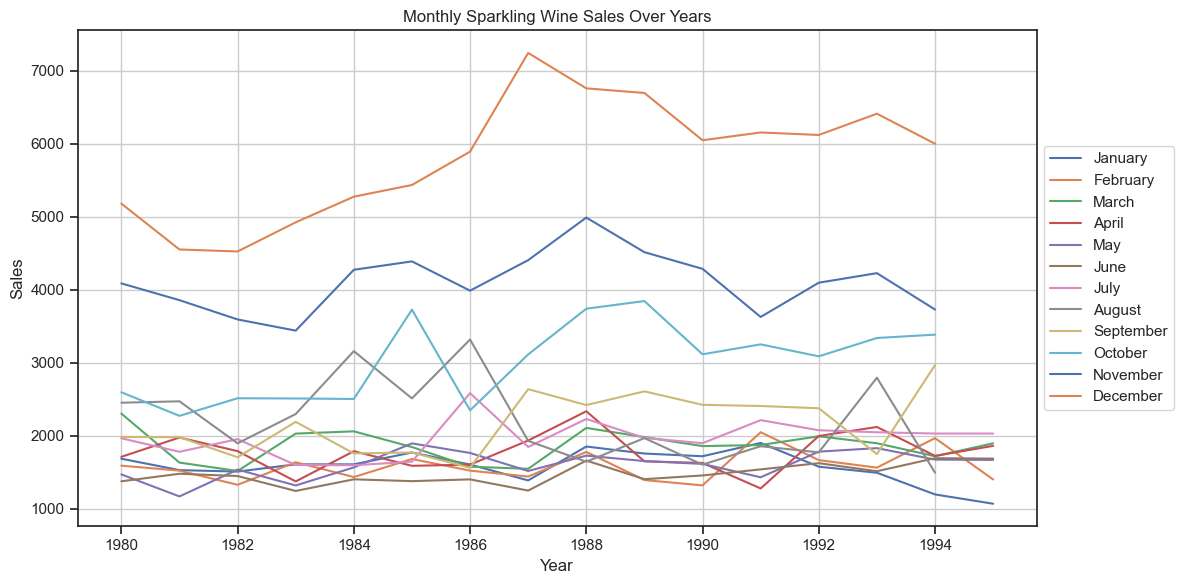

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and has the columns YearMonth, Sparkling, Year, and Month

# Group data by Year and Month, summing the Sparkling sales for each group
monthly_sales = df.groupby(['Year', 'Month'])['Sparkling'].sum().reset_index()

# Pivot the table to have months as columns and years as index
monthly_sales_pivot = monthly_sales.pivot(index='Year', columns='Month', values='Sparkling')

# Replace month numbers with month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales_pivot.columns = month_names  # Use the list for column names

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales_pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Monthly Sparkling Wine Sales Across Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


# Alternative visualization - line plot for each month over the years
plt.figure(figsize=(12, 6))

for month_num, month_name in enumerate(month_names, start=1):  #start=1 to align with month numbers
    monthly_data = monthly_sales[monthly_sales['Month'] == month_num]
    plt.plot(monthly_data['Year'], monthly_data['Sparkling'], label=month_name)  # Use month name

plt.title('Monthly Sparkling Wine Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

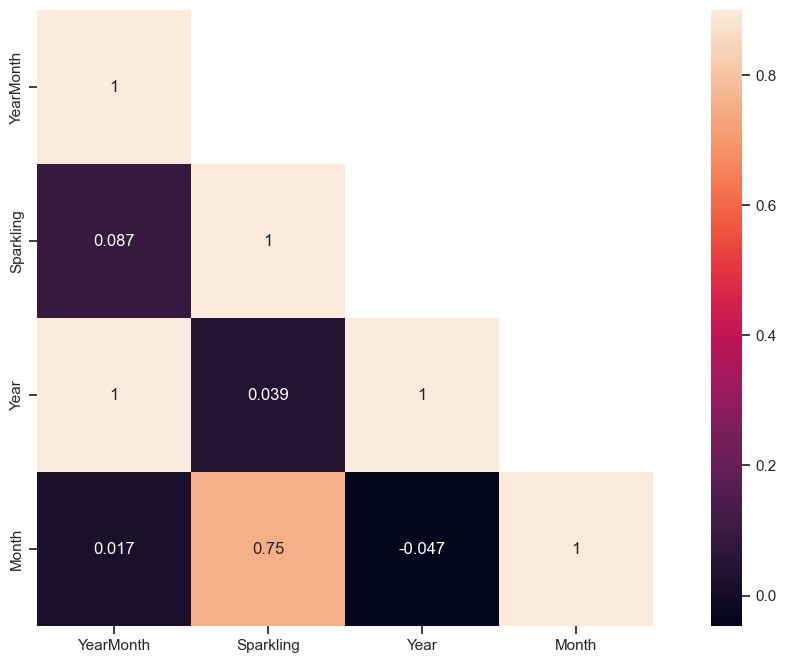

In [16]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

<Figure size 2000x800 with 0 Axes>

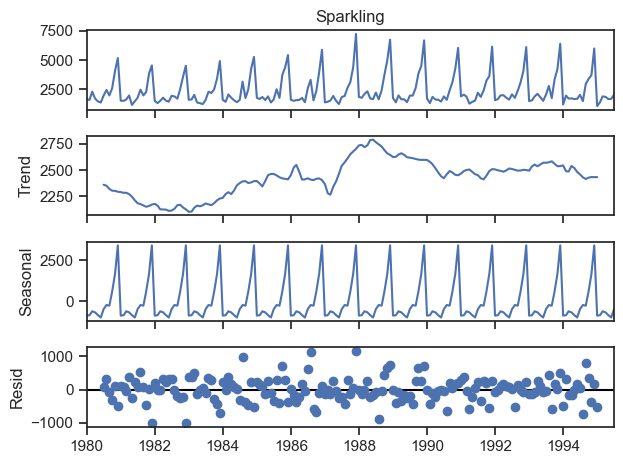

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ... (your code to load and preprocess data) ...

# Ensure 'YearMonth' is a DatetimeIndex and set the frequency
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m') # Make sure it's datetime
df = df.set_index('YearMonth')  # Set 'YearMonth' as index
df = df.asfreq('MS') # Set frequency to 'Month Start'

# Now you can decompose:
plt.figure(figsize=(20, 8))
decomposition = seasonal_decompose(df['Sparkling'], model='additive') # Use the correct column name 'Sparkling'
decomposition.plot()
plt.show()

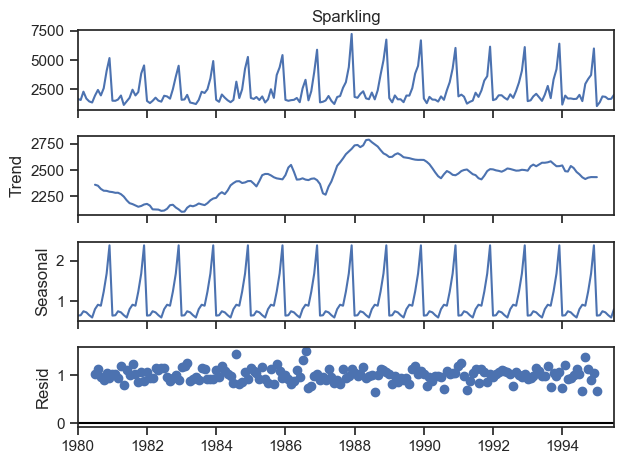

In [18]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [19]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [20]:
from IPython.display import display

In [21]:
print('First few rows of Training Data')
display(train.head(10))
print('Last few rows of Training Data')
display(train.tail(10))

First few rows of Training Data


Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5
1980-06-01       1377  1980      6
1980-07-01       1966  1980      7
1980-08-01       2453  1980      8
1980-09-01       1984  1980      9
1980-10-01       2596  1980     10

Last few rows of Training Data


Sparkling  Year  Month
YearMonth                         
1990-03-01       1859  1990      3
1990-04-01       1628  1990      4
1990-05-01       1615  1990      5
1990-06-01       1457  1990      6
1990-07-01       1899  1990      7
1990-08-01       1605  1990      8
1990-09-01       2424  1990      9
1990-10-01       3116  1990     10
1990-11-01       4286  1990     11
1990-12-01       6047  1990     12

In [22]:
print('First few rows of Test Data')
display(test.head(10))
print('Last few rows of Test Data')
display(test.tail(10))

First few rows of Test Data


Sparkling  Year  Month
YearMonth                         
1991-01-01       1902  1991      1
1991-02-01       2049  1991      2
1991-03-01       1874  1991      3
1991-04-01       1279  1991      4
1991-05-01       1432  1991      5
1991-06-01       1540  1991      6
1991-07-01       2214  1991      7
1991-08-01       1857  1991      8
1991-09-01       2408  1991      9
1991-10-01       3252  1991     10

Last few rows of Test Data


Sparkling  Year  Month
YearMonth                         
1994-10-01       3385  1994     10
1994-11-01       3729  1994     11
1994-12-01       5999  1994     12
1995-01-01       1070  1995      1
1995-02-01       1402  1995      2
1995-03-01       1897  1995      3
1995-04-01       1862  1995      4
1995-05-01       1670  1995      5
1995-06-01       1688  1995      6
1995-07-01       2031  1995      7

In [23]:
print('-------------------------------------')
print('Number of observations in Train data   :  ',train.shape)
print('Number of observations in Test data    :  ',test.shape)
print('Total Observations                     :  ',test.shape[0]+train.shape[0])
print('-------------------------------------')

-------------------------------------
Number of observations in Train data   :   (132, 3)
Number of observations in Test data    :   (55, 3)
Total Observations                     :   187
-------------------------------------


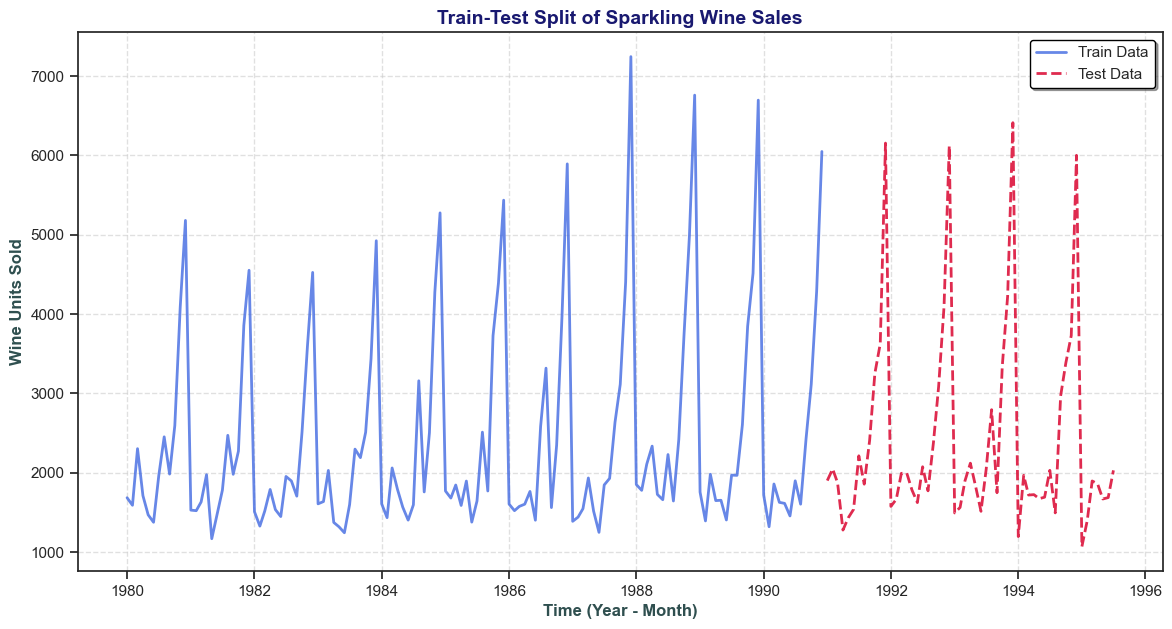

In [24]:
plt.figure(figsize=(14, 7))  # Increased figure size for better clarity

# Plotting Train Data
plt.plot(train['Sparkling'], label='Train Data', color='royalblue', linestyle='solid', linewidth=2, alpha=0.8)

# Plotting Test Data
plt.plot(test['Sparkling'], label='Test Data', color='crimson', linestyle='dashed', linewidth=2, alpha=0.9)

# Adding Labels and Titles
plt.xlabel('Time (Year - Month)', fontsize=12, fontweight='bold', color='darkslategray')
plt.ylabel('Wine Units Sold', fontsize=12, fontweight='bold', color='darkslategray')
plt.title('Train-Test Split of Sparkling Wine Sales', fontsize=14, fontweight='bold', color='midnightblue')

# Adding Grid and Legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', fontsize=11, edgecolor='black', shadow=True)

# Display the plot
plt.show()


In [25]:
#Linear

train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [26]:
#We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [27]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [28]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  Year  Month  Time
YearMonth                               
1980-01-01       1686  1980      1     1
1980-02-01       1591  1980      2     2
1980-03-01       2304  1980      3     3
1980-04-01       1712  1980      4     4
1980-05-01       1471  1980      5     5 

Last few rows of Training Data 
             Sparkling  Year  Month  Time
YearMonth                               
1990-08-01       1605  1990      8   128
1990-09-01       2424  1990      9   129
1990-10-01       3116  1990     10   130
1990-11-01       4286  1990     11   131
1990-12-01       6047  1990     12   132 

First few rows of Test Data 
             Sparkling  Year  Month  Time
YearMonth                               
1991-01-01       1902  1991      1   133
1991-02-01       2049  1991      2   134
1991-03-01       1874  1991      3   135
1991-04-01       1279  1991      4   136
1991-05-01       1432  1991      5   137 

Last few rows of Test Data 
        

**Now that our training and test data has been modified, let us go ahead use to build the model on the training data and test the model on the test data.**

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

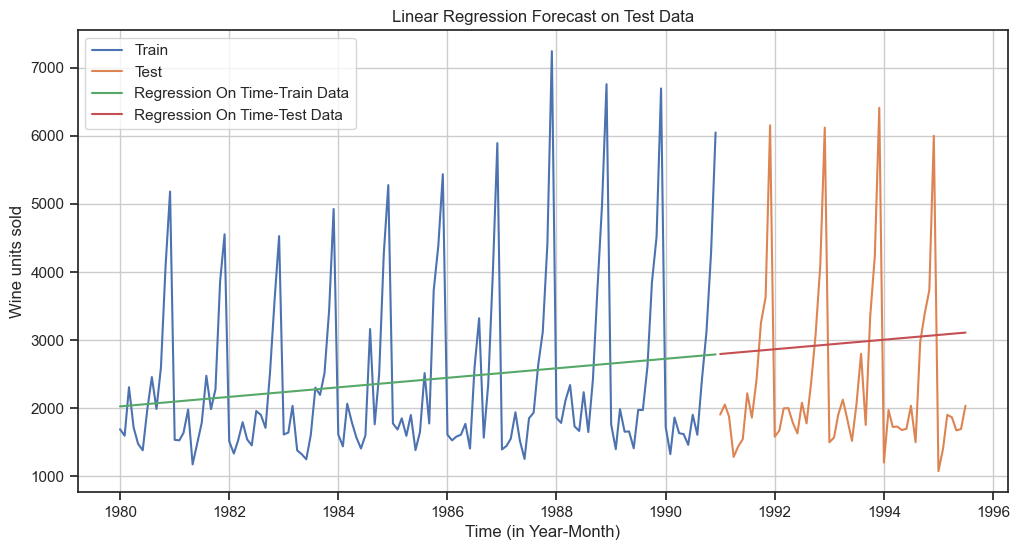

In [30]:
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

plt.figure(figsize=(12,6))
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time-Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

In [31]:
# Test Data - RMSE

rmse_LR_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [32]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1389.135175

**Simple average**

In [33]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [34]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  Year  Month  mean_forecast
YearMonth                                        
1991-01-01       1902  1991      1    2403.780303
1991-02-01       2049  1991      2    2403.780303
1991-03-01       1874  1991      3    2403.780303
1991-04-01       1279  1991      4    2403.780303
1991-05-01       1432  1991      5    2403.780303

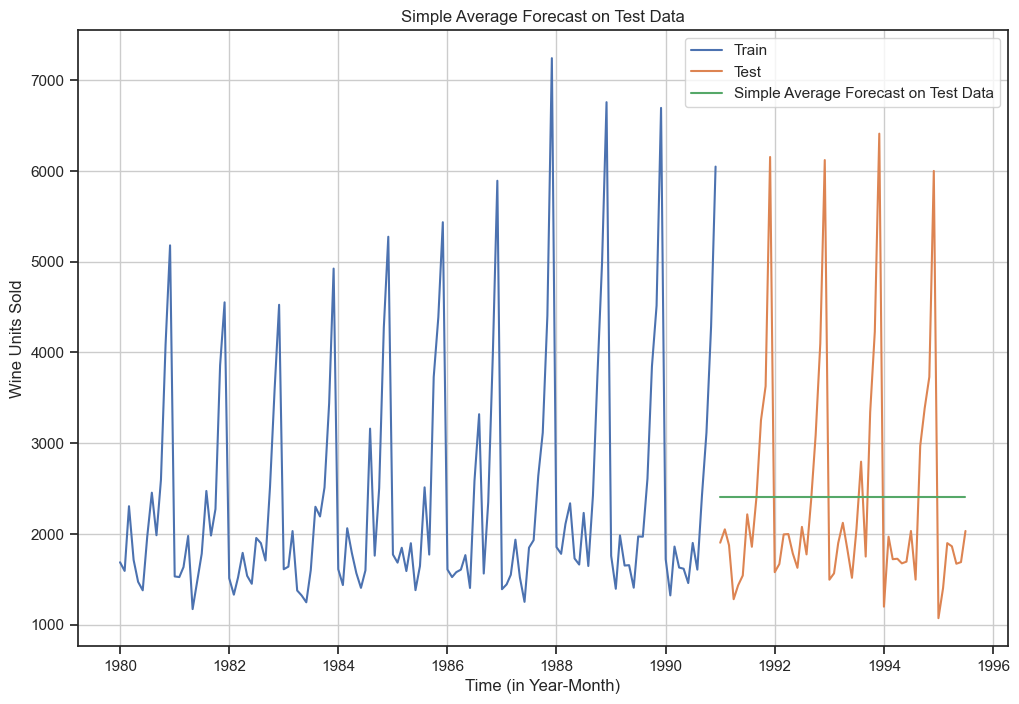

In [35]:
plt.figure(figsize=(12,8))
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

In [36]:
## Test Data - RMSE 

rmse_simple_average_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [37]:
resultsDf3 = pd.DataFrame({'Test RMSE': [rmse_simple_average_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

Test RMSE
Linear Regression  1389.135175
Simple Average     1275.081804

**Moving average**

In [38]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [39]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(9)

Sparkling  Year  Month  Trailing_2  Trailing_4   Trailing_6  \
YearMonth                                                                 
1980-01-01       1686  1980      1         NaN         NaN          NaN   
1980-02-01       1591  1980      2      1638.5         NaN          NaN   
1980-03-01       2304  1980      3      1947.5         NaN          NaN   
1980-04-01       1712  1980      4      2008.0     1823.25          NaN   
1980-05-01       1471  1980      5      1591.5     1769.50          NaN   
1980-06-01       1377  1980      6      1424.0     1716.00  1690.166667   
1980-07-01       1966  1980      7      1671.5     1631.50  1736.833333   
1980-08-01       2453  1980      8      2209.5     1816.75  1880.500000   
1980-09-01       1984  1980      9      2218.5     1945.00  1827.166667   

             Trailing_9  
YearMonth                
1980-01-01          NaN  
1980-02-01          NaN  
1980-03-01          NaN  
1980-04-01          NaN  
1980-05-01          NaN  
1980-06-01          NaN  
1980-07-01          NaN  
1980-08-01          NaN  
1980-09-01  1838.222222

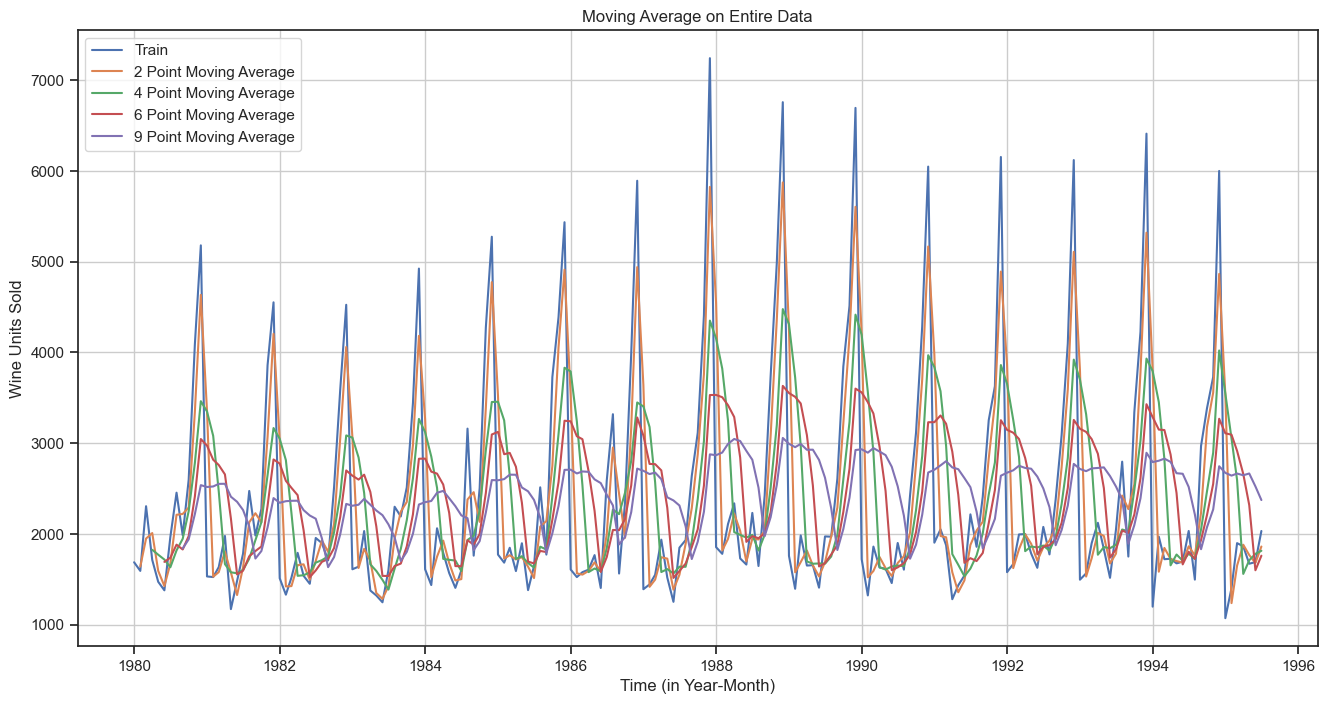

In [40]:
#Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

In [41]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Sparkling Wine Sales')

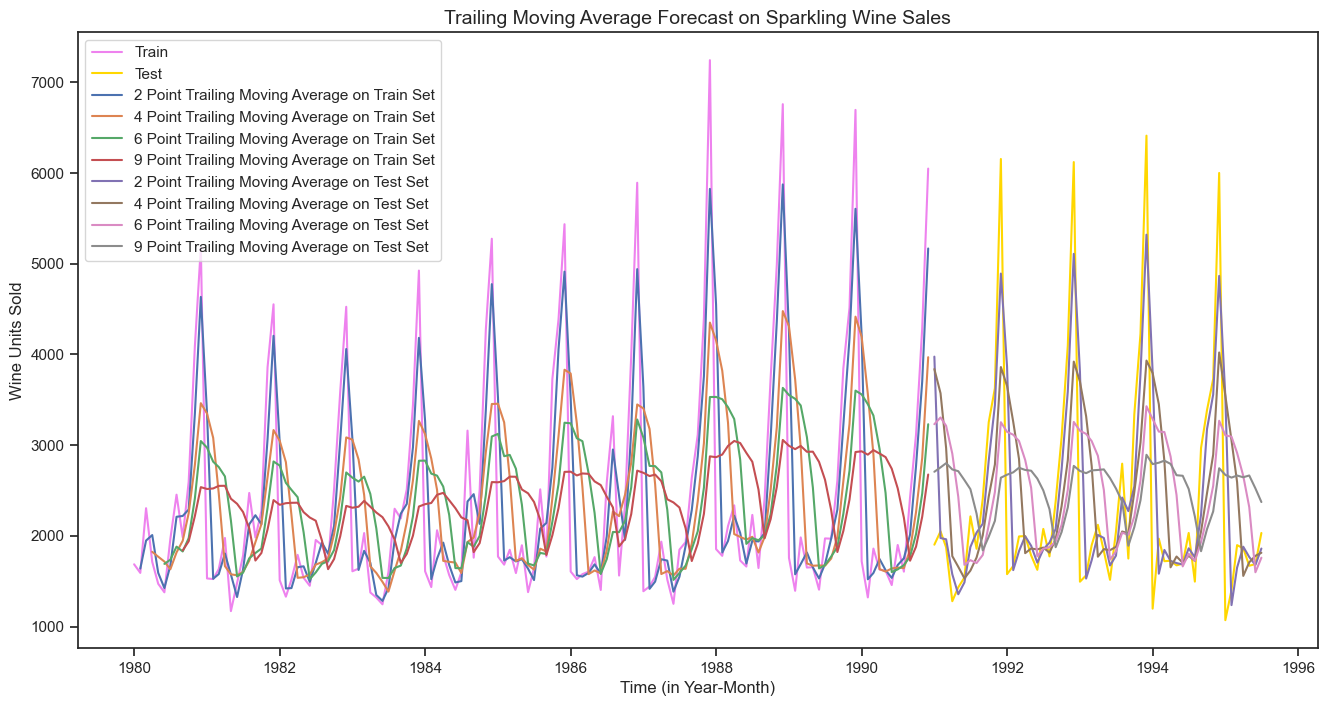

In [42]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Sparkling Wine Sales", fontsize=14)

In [43]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [44]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_MA_test_2,rmse_MA_test_4
                                          ,rmse_MA_test_6,rmse_MA_test_9]
                            }
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

Test RMSE
Linear Regression  1389.135175
Simple Average     1275.081804
2 point TMA         813.400684
4 point TMA        1156.589694
6 point TMA        1283.927428
9 point TMA        1346.278315

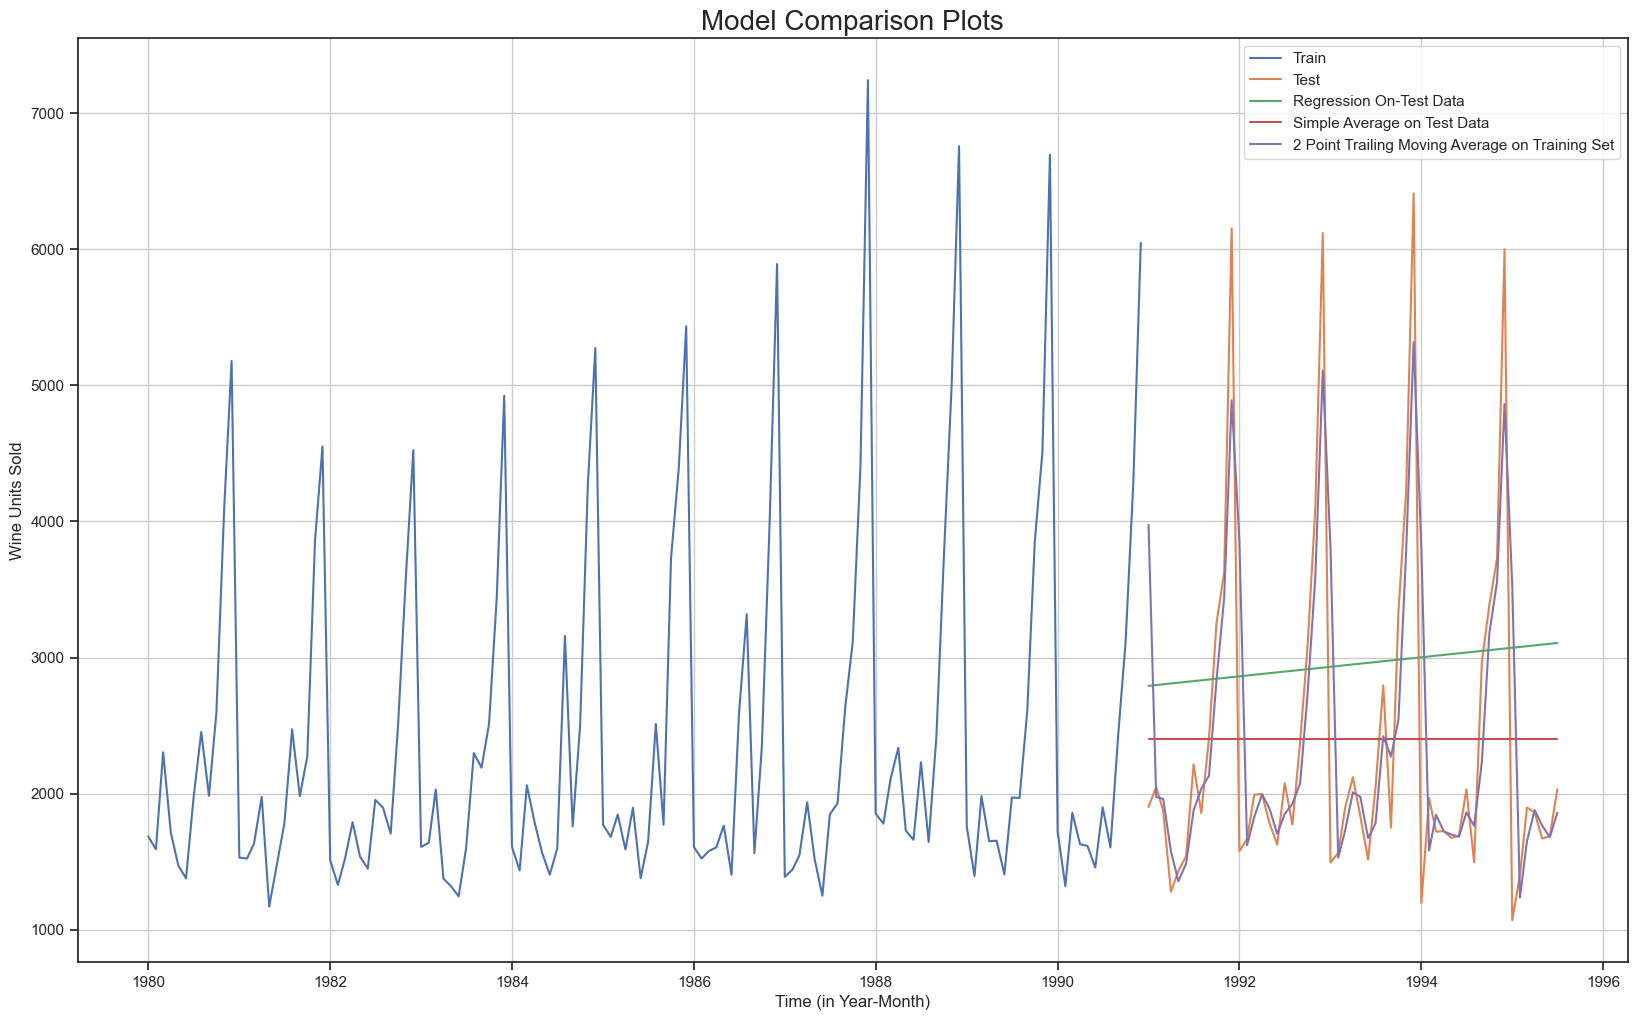

In [45]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On-Test Data')


plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=20)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

**Simple Exponential Smoothing**

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [47]:
SES_train = train.copy()
SES_test = test.copy()

In [48]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [49]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [50]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling  Year  Month      predict
YearMonth                                      
1991-01-01       1902  1991      1  2676.676366
1991-02-01       2049  1991      2  2676.676366
1991-03-01       1874  1991      3  2676.676366
1991-04-01       1279  1991      4  2676.676366
1991-05-01       1432  1991      5  2676.676366

Text(0, 0.5, 'Wine Units Sold')

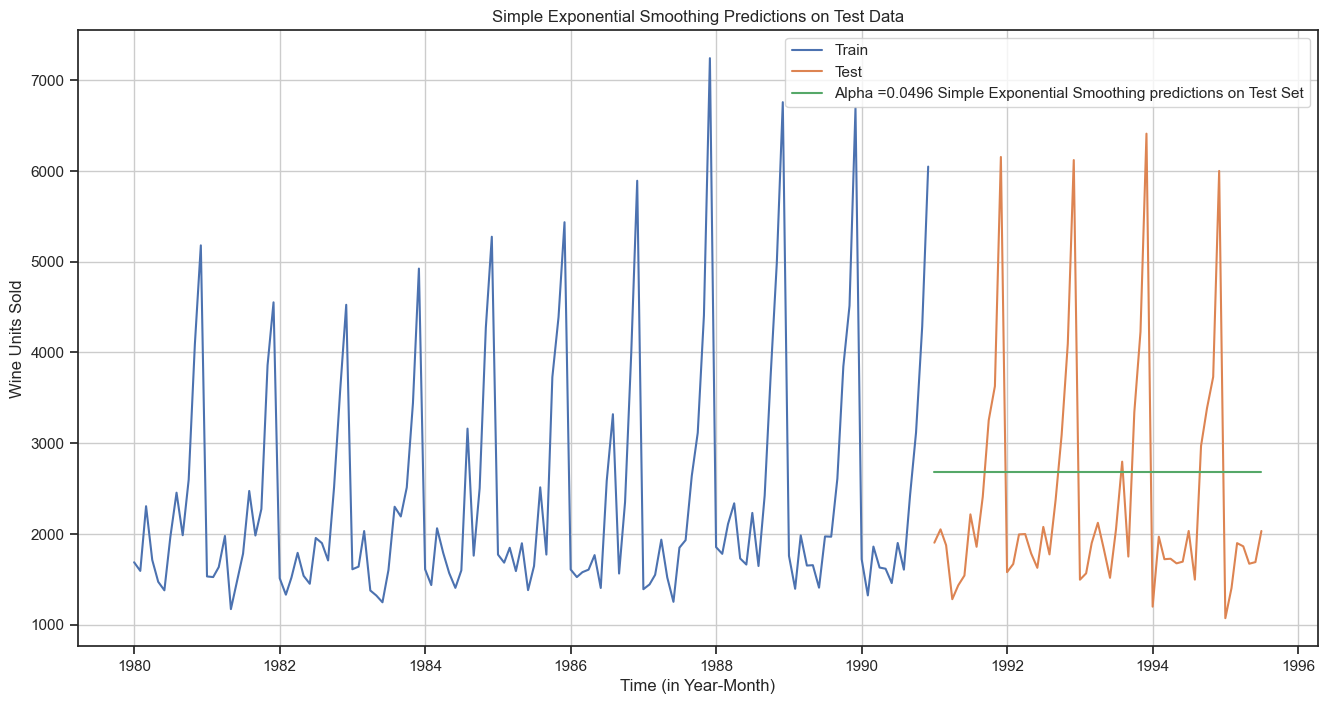

In [52]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [53]:
#Model Evaluation for = 0.0496 : Simple Exponential Smoothing

In [54]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [55]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha =0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                         1389.135175
Simple Average                            1275.081804
2 point TMA                                813.400684
4 point TMA                               1156.589694
6 point TMA                               1283.927428
9 point TMA                               1346.278315
Alpha =0.0496,SimpleExponentialSmoothing  1304.927405

In [56]:
#A higher alpha gives more weight to recent observations, emphasizing recent trends. This implies that recent patterns are expected to continue.We'll iterate through various alpha values to determine the optimal one for the test set.


In [57]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [58]:

from sklearn import metrics

results_list = []  # Store results before converting to DataFrame

for i in np.arange(0.1, 1, 0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    
    # Store predictions
    SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
    SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(steps=len(test))
    
    # Calculate RMSE
    rmse_train = metrics.mean_squared_error(SES_train['Sparkling'], SES_train[f'predict_{i}'], squared=False)
    rmse_test = metrics.mean_squared_error(SES_test['Sparkling'], SES_test[f'predict_{i}'], squared=False)
    
    # Append results to list
    results_list.append({'Alpha Values': i, 'Train RMSE': rmse_train, 'Test RMSE': rmse_test})

# Convert results to DataFrame
resultsDf_6 = pd.DataFrame(results_list)


In [59]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.10  1333.873836  1375.393398
1           0.15  1347.521016  1466.203651
2           0.20  1356.042987  1595.206839
3           0.25  1359.701408  1755.488175
4           0.30  1359.511747  1935.507132
5           0.35  1356.733677  2123.914871
6           0.40  1352.588879  2311.919615
7           0.45  1348.095362  2493.786514
8           0.50  1344.004369  2666.351413
9           0.55  1340.811249  2828.246418
10          0.60  1338.805381  2979.204388
11          0.65  1338.131249  3119.560885
12          0.70  1338.844308  3249.944092
13          0.75  1340.955212  3371.100106
14          0.80  1344.462091  3483.801006
15          0.85  1349.373283  3588.797654
16          0.90  1355.723518  3686.794285
17          0.95  1363.586057  3778.432623

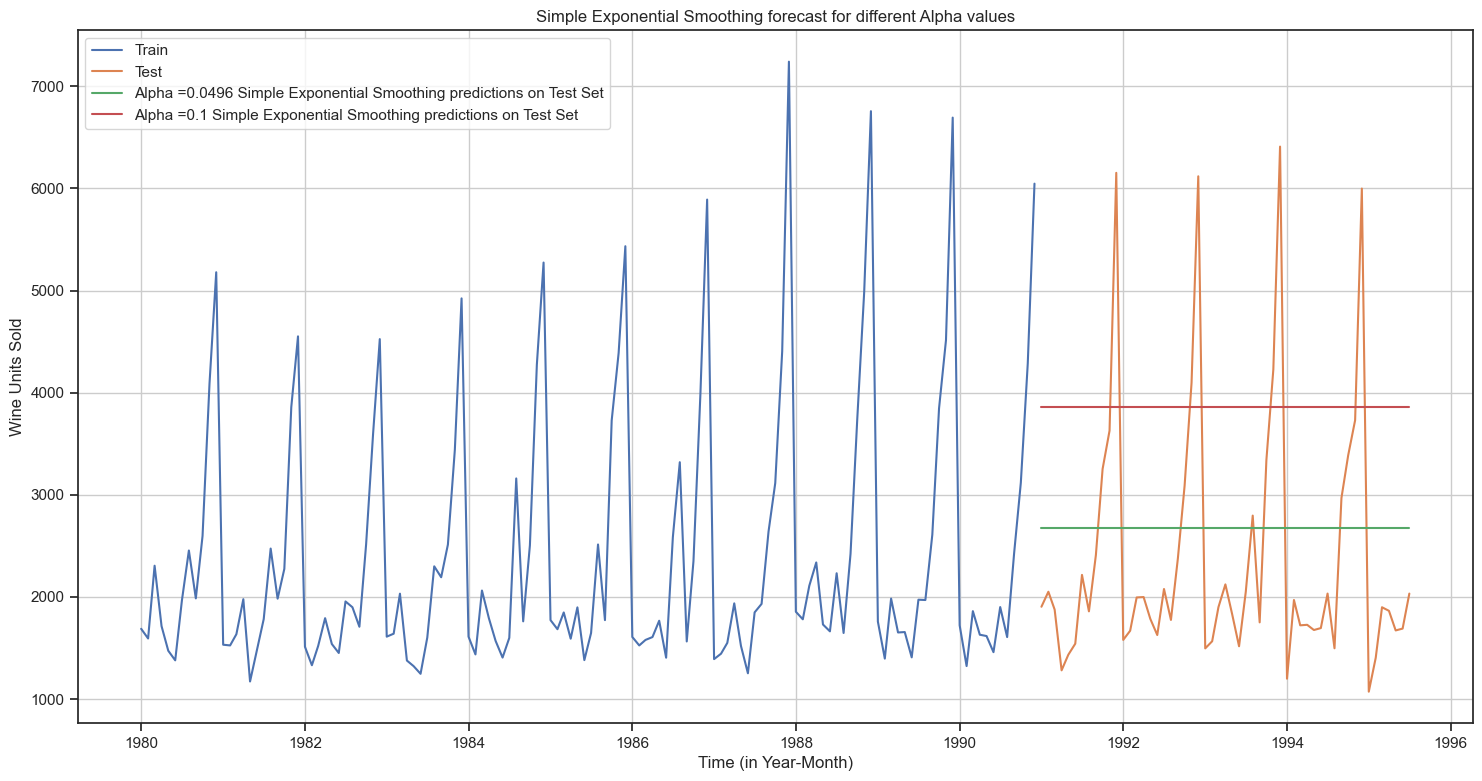

In [60]:
## Plotting on both the Training and Test data
model_SES_alpha_i = model_SES.fit(smoothing_level=0.3,optimized=False,use_brute=True)
SES_train['predict',0.1] = model_SES_alpha_i.fittedvalues
SES_test['predict',0.1] = model_SES_alpha_i.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing forecast for different Alpha values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

**Double smoothing**

In [61]:
DES_train = train.copy()
DES_test = test.copy()

In [62]:
from statsmodels.tsa.holtwinters import Holt

# Ensure DES_train contains only the target column
model_DES = Holt(DES_train['Sparkling'])  # Replace 'Sparkling' with your actual column name

# Fit the model
model_DES = model_DES.fit(optimized=True, use_brute=True)


In [63]:
model_DES.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
# Forecasting using this model for the test set
DES_test['predict'] =  model_DES.forecast(len(test))
DES_test['predict']

YearMonth
1991-01-01    5221.278699
1991-02-01    5127.886554
1991-03-01    5034.494409
1991-04-01    4941.102264
1991-05-01    4847.710119
1991-06-01    4754.317974
1991-07-01    4660.925829
1991-08-01    4567.533684
1991-09-01    4474.141539
1991-10-01    4380.749394
1991-11-01    4287.357249
1991-12-01    4193.965104
1992-01-01    4100.572959
1992-02-01    4007.180813
1992-03-01    3913.788668
1992-04-01    3820.396523
1992-05-01    3727.004378
1992-06-01    3633.612233
1992-07-01    3540.220088
1992-08-01    3446.827943
1992-09-01    3353.435798
1992-10-01    3260.043653
1992-11-01    3166.651508
1992-12-01    3073.259363
1993-01-01    2979.867218
1993-02-01    2886.475073
1993-03-01    2793.082928
1993-04-01    2699.690783
1993-05-01    2606.298638
1993-06-01    2512.906493
1993-07-01    2419.514348
1993-08-01    2326.122203
1993-09-01    2232.730058
1993-10-01    2139.337913
1993-11-01    2045.945768
1993-12-01    1952.553623
1994-01-01    1859.161478
1994-02-01    1765.769333
19

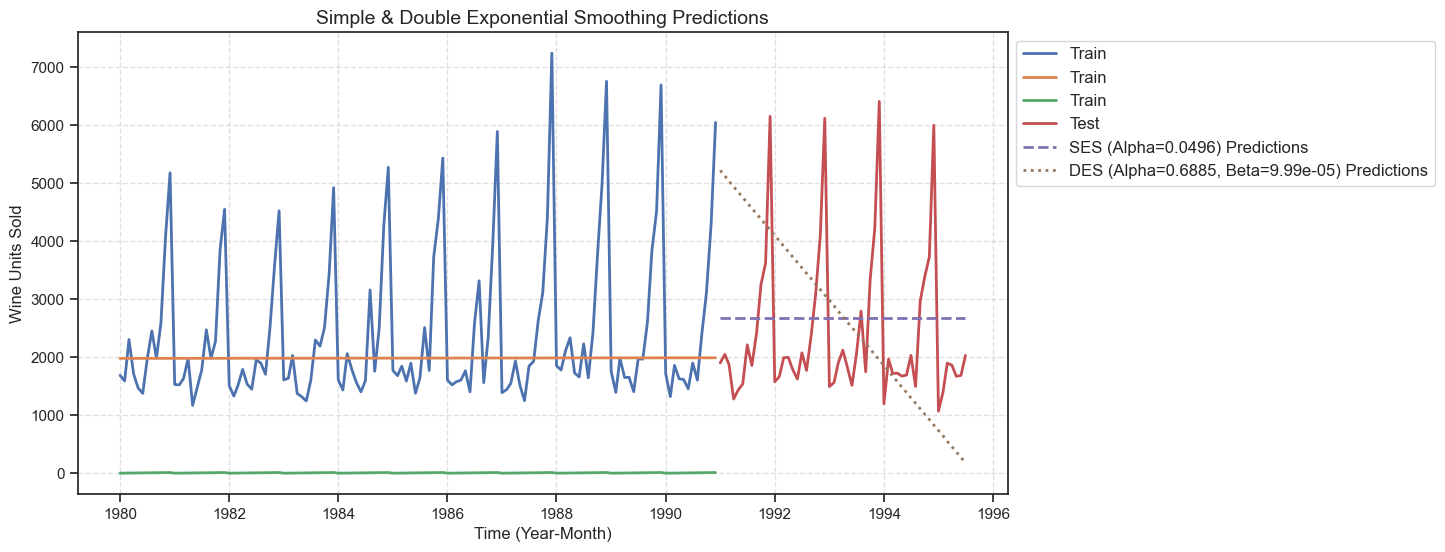

In [65]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(12,6))  # Expand plot size

plt.plot(DES_train, label='Train', linewidth=2)
plt.plot(DES_test['Sparkling'], label='Test', linewidth=2)

# Differentiate prediction lines with styles
plt.plot(SES_test['predict'], '--', label='SES (Alpha=0.0496) Predictions', linewidth=2)
plt.plot(DES_test['predict'], ':', label='DES (Alpha=0.6885, Beta=9.99e-05) Predictions', linewidth=2)

plt.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1,1))  # Move legend outside
plt.grid(True, linestyle='--', alpha=0.6)  # Improve grid visibility
plt.title('Simple & Double Exponential Smoothing Predictions', fontsize=14)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Wine Units Sold', fontsize=12)

plt.show()


In [66]:
rmse_DES_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For DES forecast on the Sparkling Testing Data:  RMSE is %3.3f" %(rmse_DES_test))

For DES forecast on the Sparkling Testing Data:  RMSE is 2007.239


In [67]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_DES_test]},index=['Alpha=0.6885, Beta=9.99e-05, Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1304.927405
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526

In [68]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha, Beta, Train RMSE, Test RMSE]
Index: []

In [69]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import Holt
from sklearn import metrics

# Assuming DES_train and DES_test are your DataFrames, and resultsDf_6 is your DataFrame to store results

model_DES = Holt(DES_train['Sparkling'])

for i in np.arange(0.05, 1.05, 0.05):
    for j in np.arange(0.05, 1.05, 0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True)
        
        DES_train[('predict', i, j)] = model_DES_alpha_i_j.fittedvalues
        DES_test[('predict', i, j)] = model_DES_alpha_i_j.forecast(len(DES_test))  # Use len(DES_test)

        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'], DES_train[('predict', i, j)], squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'], DES_test[('predict', i, j)], squared=False)

        # Use pd.concat instead of append
        new_row = pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test]})
        resultsDf_6 = pd.concat([resultsDf_6, new_row], ignore_index=True)

In [70]:
resultsDf_6

Alpha  Beta   Train RMSE     Test RMSE
0     0.05  0.05  1430.025526   1418.407668
1     0.05  0.10  1385.420826   1466.899629
2     0.05  0.15  1379.162520   1457.041594
3     0.05  0.20  1382.766405   1443.099273
4     0.05  0.25  1390.407645   1550.422496
..     ...   ...          ...           ...
395   1.00  0.80  1902.013709  55442.273880
396   1.00  0.85  1942.749655  56677.130498
397   1.00  0.90  1985.368445  57823.177011
398   1.00  0.95  2030.204345  58888.482146
399   1.00  1.00  2077.672157  59877.076519

[400 rows x 4 columns]

In [71]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta   Train RMSE    Test RMSE
0   0.05  0.05  1430.025526  1418.407668
3   0.05  0.20  1382.766405  1443.099273
2   0.05  0.15  1379.162520  1457.041594
1   0.05  0.10  1385.420826  1466.899629
6   0.05  0.35  1414.226231  1547.022626

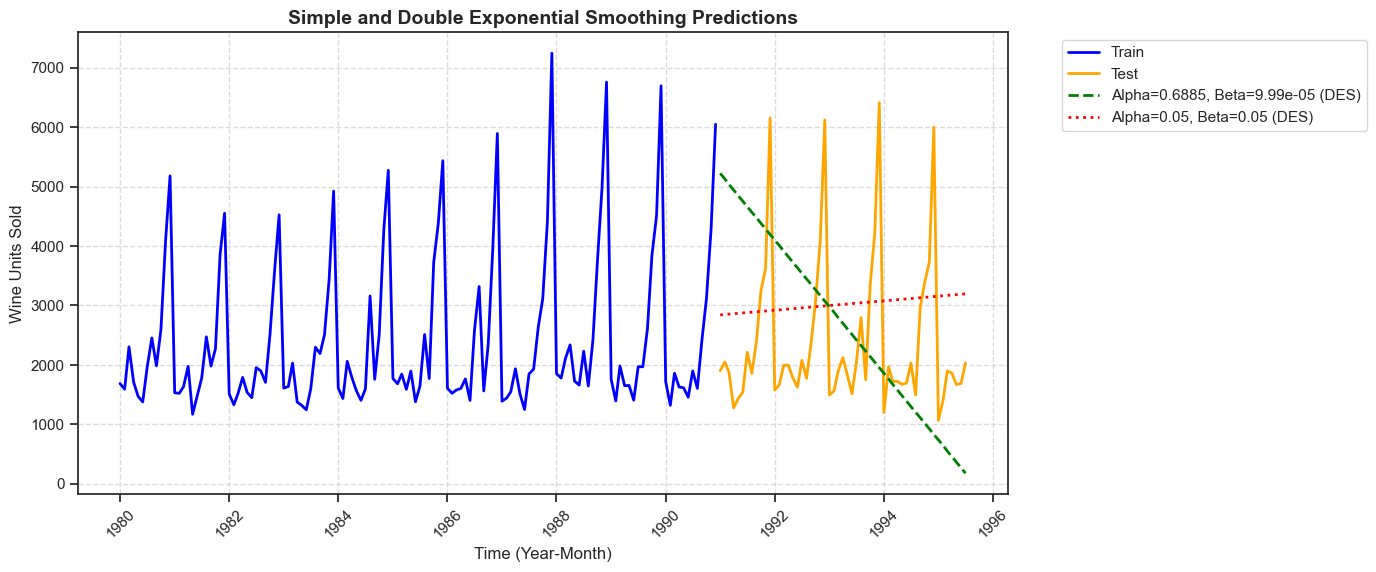

In [72]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(12, 6))  # Expand plot size

# Plot Training & Test Data
plt.plot(DES_train['Sparkling'], label='Train', color='blue', linewidth=2)
plt.plot(DES_test['Sparkling'], label='Test', color='orange', linewidth=2)

# Plot Forecasted Values with Different Styles
plt.plot(DES_test['predict'], label='Alpha=0.6885, Beta=9.99e-05 (DES)', linestyle='--', color='green', linewidth=2)
plt.plot(DES_test['predict', 0.05, 0.05], label='Alpha=0.05, Beta=0.05 (DES)', linestyle=':', color='red', linewidth=2)

# Beautification
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Move legend outside
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Simple and Double Exponential Smoothing Predictions', fontsize=14, fontweight='bold')
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Wine Units Sold', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()


In [73]:
DES_Model2_rmse = float(resultsDf_6[(resultsDf_6['Alpha']==0.05) & (resultsDf_6['Beta']==0.05)]['Test RMSE'])
DES_Model2_rmse

1418.4076682004925

In [74]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [DES_Model2_rmse]},index=['Alpha=0.05, Beta=0.05, Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1304.927405
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668

**Method 6: Triple Exponential Smoothing (Holt - Winter's Model)Three parameters ,  and  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.**

In [75]:
print(train.index)
print(train.index.freq)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', name='YearMonth', length=132, freq='MS')
<MonthBegin>


In [76]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'train' is your DataFrame

# Create the 'YearMonth' column
train['YearMonth'] = pd.to_datetime(train['Year'].astype(str) + '-' + train['Month'].astype(str), format='%Y-%m')

# Set 'YearMonth' as index and ensure it's DatetimeIndex
train = train.set_index('YearMonth')
train.index = pd.to_datetime(train.index)

# Set the frequency to Month Start ('MS') or Month End ('M')
train = train.asfreq('MS')  # Or 'M'

# Now copy train to TES_train
TES_train = train.copy()
TES_test = test.copy()

# Now create the ExponentialSmoothing model:
model_TES = ExponentialSmoothing(TES_train['Sparkling'], trend='additive', seasonal='multiplicative', freq='MS') # Use 'MS' or 'M'

In [77]:
model_TES_autofit = model_TES.fit(optimized=True)

In [78]:
model_TES_autofit.params

{'smoothing_level': 0.11101471561088701,
 'smoothing_trend': 0.0493145907614654,
 'smoothing_seasonal': 0.36244934537370843,
 'damping_trend': nan,
 'initial_level': 2356.496908624238,
 'initial_trend': -9.809526161838415,
 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
        0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
        1.87099202, 2.37505867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  Year  Month  auto_predict
YearMonth                                       
1991-01-01       1902  1991      1   1587.923122
1991-02-01       2049  1991      2   1356.650595
1991-03-01       1874  1991      3   1763.350752
1991-04-01       1279  1991      4   1656.524633
1991-05-01       1432  1991      5   1542.386930

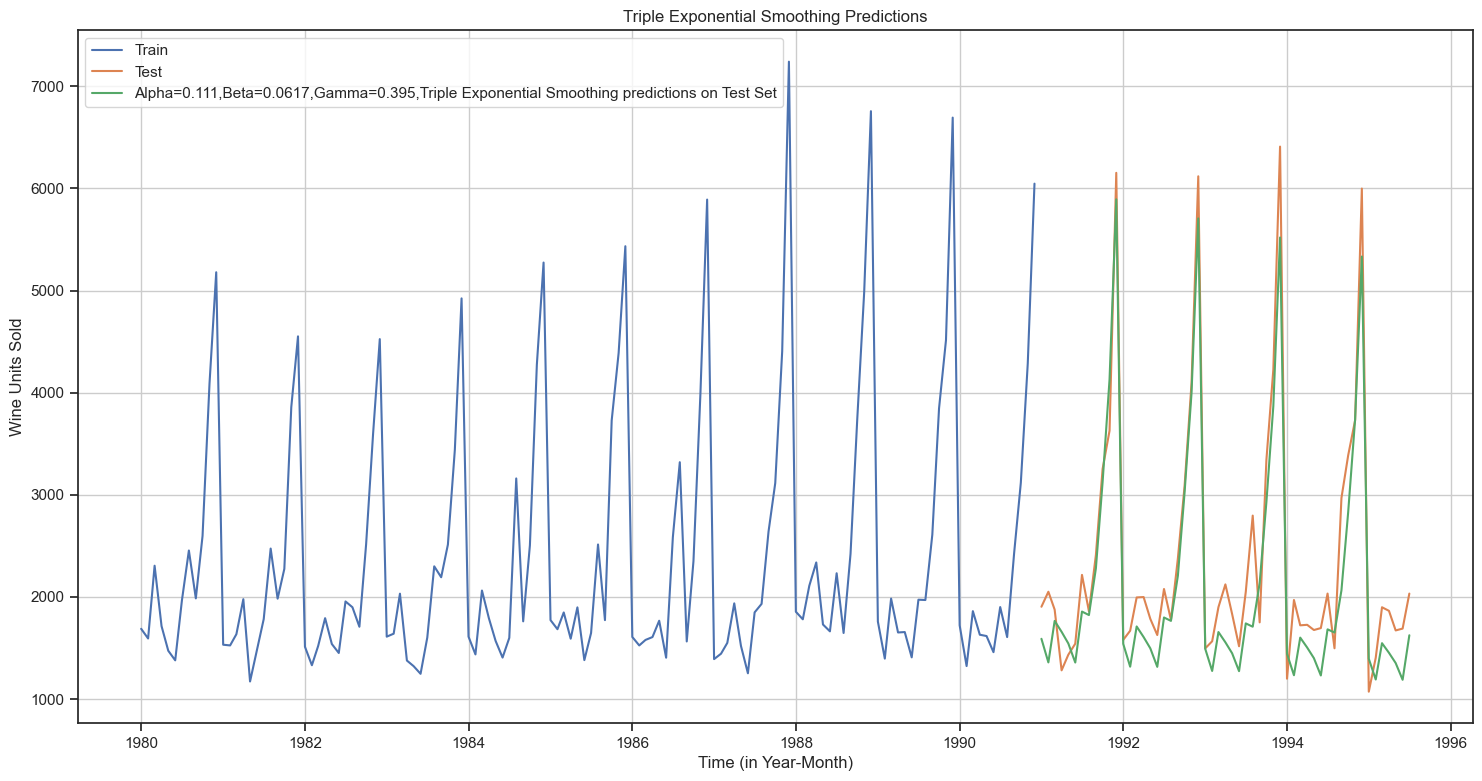

In [80]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

In [81]:
## Test Data

rmse_tes_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_tes_test))

For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 402.936


In [82]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_tes_test]}
                           ,index=['Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1304.927405
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   402.936179

In [83]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [84]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn import metrics

# Assuming TES_train and TES_test are your DataFrames, and resultsDf_8_2 is your DataFrame to store results

for i in np.arange(0.1, 1.05, 0.05):
    for j in np.arange(0.1, 1.05, 0.05):
        for k in np.arange(0.1, 1.05, 0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False, use_brute=True)
            
            TES_train[('predict', i, j, k)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[('predict', i, j, k)] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test)) # Use len(TES_test)

            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'], TES_train[('predict', i, j, k)], squared=False)
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'], TES_test[('predict', i, j, k)], squared=False)

            # Use pd.concat instead of append
            new_row = pd.DataFrame({'Alpha': [i], 'Beta': [j], 'Gamma': [k], 'Train RMSE': [rmse_model8_train], 'Test RMSE': [rmse_model8_test]})
            resultsDf_8_2 = pd.concat([resultsDf_8_2, new_row], ignore_index=True)

In [85]:
resultsDf_8_2

Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10  3.814397e+02  5.910387e+02
1       0.1   0.1   0.15  3.735719e+02  6.073917e+02
2       0.1   0.1   0.20  3.677929e+02  6.214407e+02
3       0.1   0.1   0.25  3.638217e+02  6.322427e+02
4       0.1   0.1   0.30  3.614334e+02  6.395595e+02
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80  1.101923e+06  2.700435e+05
6855    1.0   1.0   0.85  7.467886e+04  1.094394e+06
6856    1.0   1.0   0.90  7.695708e+04  2.472201e+05
6857    1.0   1.0   0.95  3.058385e+05  1.273915e+06
6858    1.0   1.0   1.00  2.456050e+04  1.256914e+05

[6859 rows x 5 columns]

In [86]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE   Test RMSE
2168   0.40   0.1   0.20  384.467709  317.434302
1806   0.35   0.1   0.15  384.458451  321.078383
1122   0.25   0.2   0.15  391.339330  324.959874
2530   0.45   0.1   0.25  388.413304  325.857010
2169   0.40   0.1   0.25  383.050293  326.251722

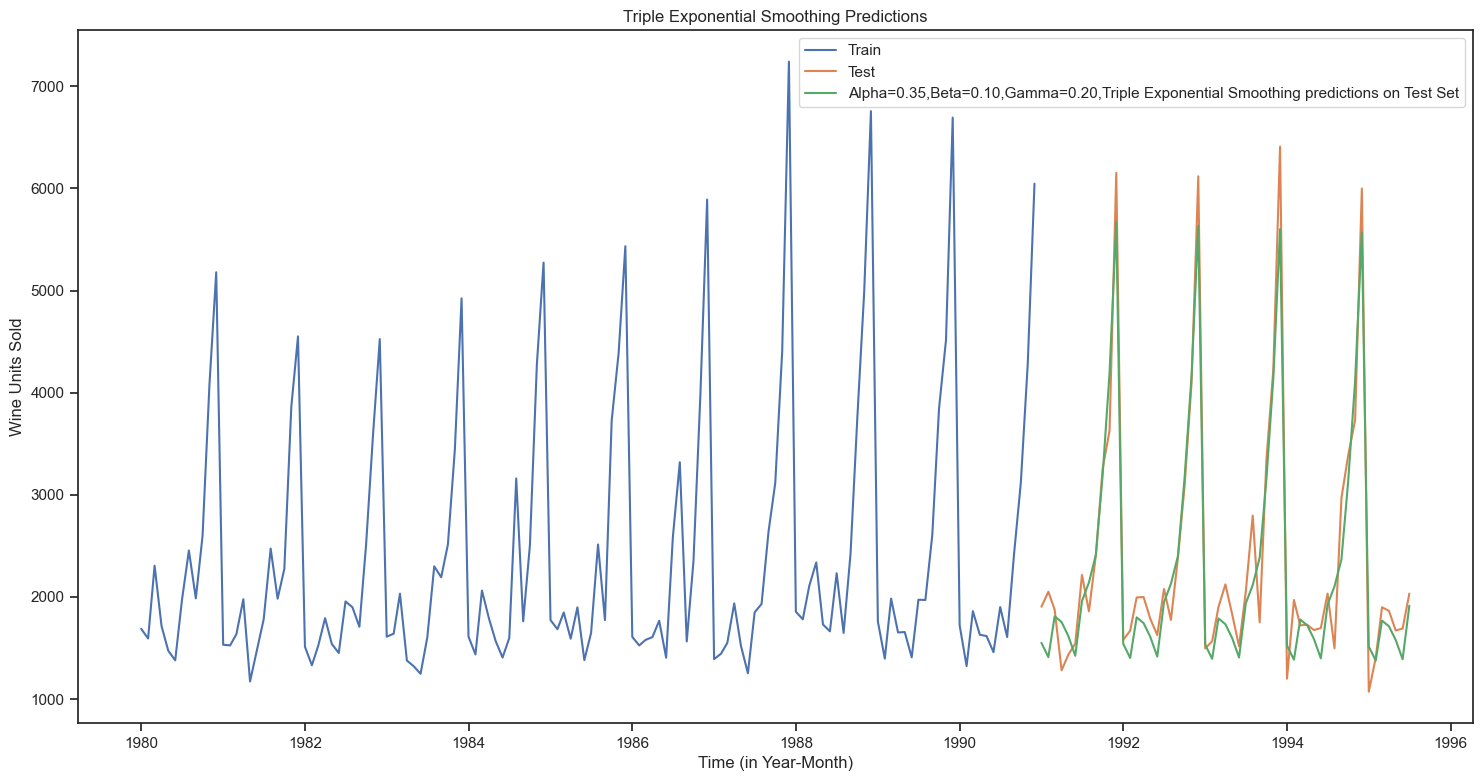

In [87]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.35,smoothing_trend=0.10,smoothing_seasonal=0.20,optimized=False,use_brute=True)
TES_train['predict',0.35,0.10,0.20] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.35,0.10,0.20] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',0.35,0.10,0.20],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

In [88]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_tes_test_lowest]}
                           ,index=['Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1304.927405
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   402.936179
Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponent...   331.037724

In [89]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponent...   331.037724
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   402.936179
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
Simple Average                                      1275.081804
6 point TMA                                         1283.927428
Alpha =0.0496,SimpleExponentialSmoothing            1304.927405
9 point TMA                                         1346.278315
Linear Regression                                   1389.135175
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526

Text(0, 0.5, 'Wine Units Sold')

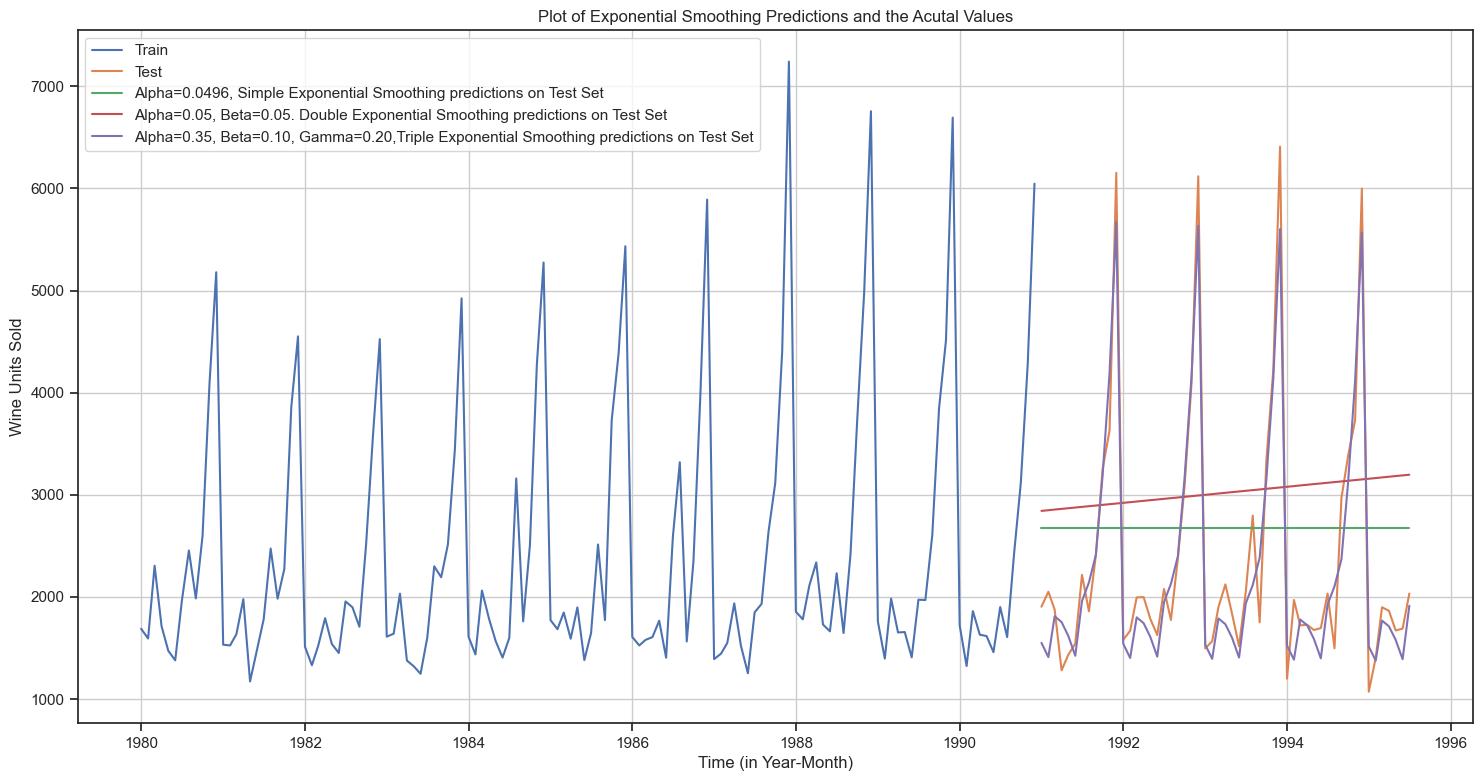

In [90]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0496, Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict',0.05,0.05], label='Alpha=0.05, Beta=0.05. Double Exponential Smoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35, Beta=0.10, Gamma=0.20,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

**stationarity**

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
print('Results of Dickey-Fuller Test')
dftest = adfuller(df['Sparkling'], regression='ct')  # Select a single column
print('DF test statistic is %3.3f' % dftest[0])
print('DF test p-value is', dftest[1])
print('Number of lags used', dftest[2])


Results of Dickey-Fuller Test
DF test statistic is -1.798
DF test p-value is 0.7055958459932516
Number of lags used 12


In [93]:
#We see that at 5% significant level the Time Series is non-stationary.Let us take one level of differencing to see whether the series becomes stationary.

In [94]:
print('Results of Dickey-Fuller Test with Differencing')
dftest = adfuller(df['Sparkling'].diff().dropna(), regression='ct')  # Apply differencing to a single column

print('DF test statistic is %3.3f' % dftest[0])
print('DF test p-value is', dftest[1])
print('Number of lags used', dftest[2])


Results of Dickey-Fuller Test with Differencing
DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


Text(0.5, 0, 'Time (in Year-Month)')

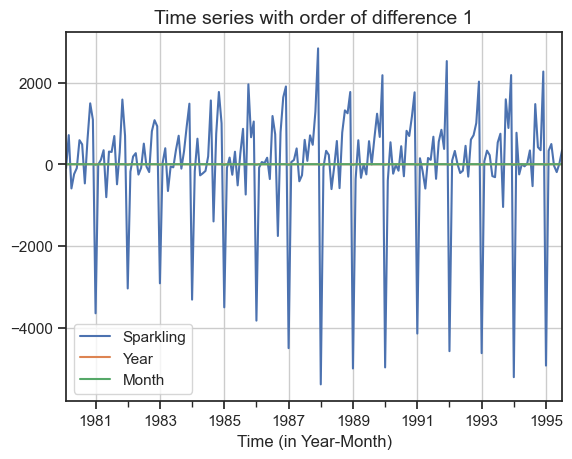

In [95]:
df.diff().dropna().plot(grid=True);
plt.title('Time series with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')

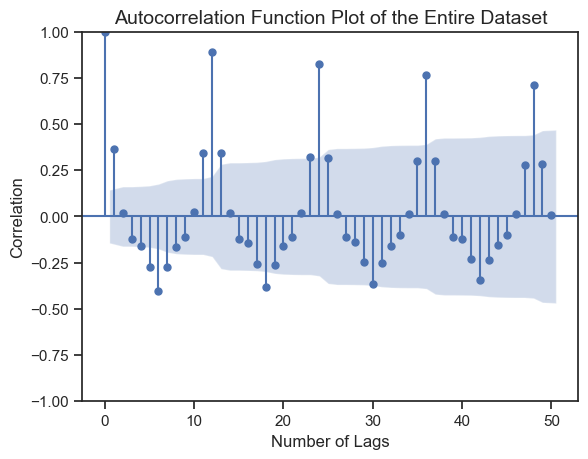

In [96]:
#ACF plot

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Sparkling'], alpha=0.05, lags=50)
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()


<Figure size 1200x600 with 0 Axes>

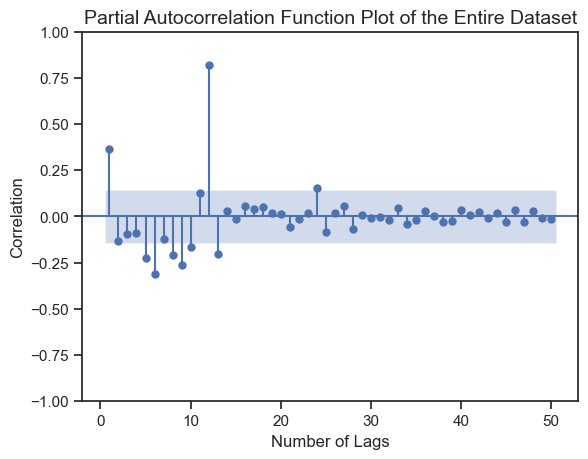

In [97]:
#PACF plot

from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))  # Adjust the width and height
plot_pacf(df['Sparkling'], zero=False, alpha=0.05, lags=50, method='ywmle')


plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()


**ARIMA**

In [98]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [99]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [100]:
from statsmodels.tsa.arima.model import ARIMA


ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])  # Ensure ARIMA_AIC is initialized as a DataFrame

for param in pdq:  # Loop through parameter combinations
    ARIMA_model = ARIMA(train['Sparkling'].values, order=param).fit()  # Fit ARIMA model
    print(f'ARIMA{param} - AIC: {ARIMA_model.aic}')  # Print AIC for each model

    # Append results using pd.concat()
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param': param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

print(ARIMA_AIC.sort_values(by='AIC'))  # Sort results by AIC to find the best model


ARIMA(0, 1, 0) - AIC: 2267.6630357855465
ARIMA(0, 1, 1) - AIC: 2263.0600155918555
ARIMA(0, 1, 2) - AIC: 2234.4083231291497
ARIMA(0, 1, 3) - AIC: 2233.994857739982
ARIMA(0, 1, 4) - AIC: 2235.1737364706064
ARIMA(1, 1, 0) - AIC: 2266.6085393190097
ARIMA(1, 1, 1) - AIC: 2235.7550946734245
ARIMA(1, 1, 2) - AIC: 2234.5272004520966
ARIMA(1, 1, 3) - AIC: 2235.607813273727
ARIMA(1, 1, 4) - AIC: 2227.7369766914435
ARIMA(2, 1, 0) - AIC: 2260.365743968097
ARIMA(2, 1, 1) - AIC: 2233.777626299803
ARIMA(2, 1, 2) - AIC: 2213.5092124179537
ARIMA(2, 1, 3) - AIC: 2232.915097876781
ARIMA(2, 1, 4) - AIC: 2222.921832418164
ARIMA(3, 1, 0) - AIC: 2257.72337899794
ARIMA(3, 1, 1) - AIC: 2235.5001880892823
ARIMA(3, 1, 2) - AIC: 2230.7760106772266
ARIMA(3, 1, 3) - AIC: 2221.4556694788344
ARIMA(3, 1, 4) - AIC: 2219.961201440492
ARIMA(4, 1, 0) - AIC: 2259.741841399271
ARIMA(4, 1, 1) - AIC: 2237.073041265756
ARIMA(4, 1, 2) - AIC: 2233.0495460067327
ARIMA(4, 1, 3) - AIC: 2222.904099804451
ARIMA(4, 1, 4) - AIC: 2213.4

In [101]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
24  (4, 1, 4)  2213.497878
12  (2, 1, 2)  2213.509212
19  (3, 1, 4)  2219.961201
18  (3, 1, 3)  2221.455669
23  (4, 1, 3)  2222.904100

In [102]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(4,1,4))
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1097.749
Date:                Sat, 22 Feb 2025   AIC                           2213.498
Time:                        17:50:43   BIC                           2239.375
Sample:                    01-01-1980   HQIC                          2224.013
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4828      0.128     -3.773      0.000      -0.734      -0.232
ar.L2         -0.4847      0.075     -6.441      0.000      -0.632      -0.337
ar.L3         -0.4822      0.108     -4.454      0.0

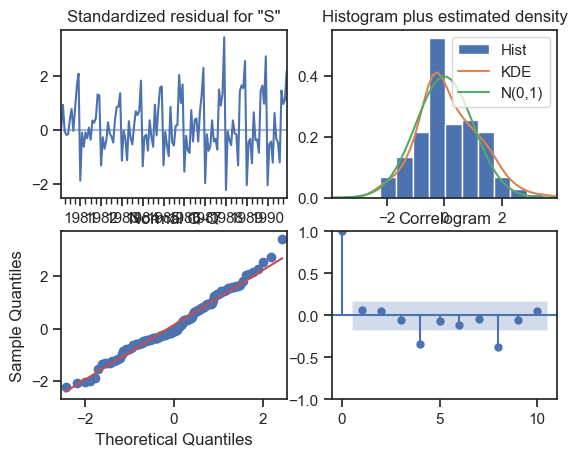

In [103]:
results_auto_ARIMA.plot_diagnostics();

In [104]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [105]:
predicted_auto_ARIMA

1991-01-01    3369.487017
1991-02-01    2707.902739
1991-03-01    3019.222834
1991-04-01    3369.156876
1991-05-01    1988.511617
1991-06-01    1994.468715
1991-07-01    2652.537653
1991-08-01    3177.948865
1991-09-01    1890.930048
1991-10-01    1943.427048
1991-11-01    2627.717886
1991-12-01    3163.191877
1992-01-01    1884.411211
1992-02-01    1939.392320
1992-03-01    2627.151141
1992-04-01    3160.959907
1992-05-01    1884.349738
1992-06-01    1938.698002
1992-07-01    2628.300314
1992-08-01    3159.621070
1992-09-01    1884.742230
1992-10-01    1938.245579
1992-11-01    2629.566244
1992-12-01    3158.349967
1993-01-01    1885.162725
1993-02-01    1937.815158
1993-03-01    2630.835485
1993-04-01    3157.088001
1993-05-01    1885.581025
1993-06-01    1937.391111
1993-07-01    2632.100013
1993-08-01    3155.830989
1993-09-01    1885.995013
1993-10-01    1936.972300
1993-11-01    2633.359286
1993-12-01    3154.578607
1994-01-01    1886.404566
1994-02-01    1936.558619
1994-03-01  

Text(0, 0.5, 'Wine Units Sold')

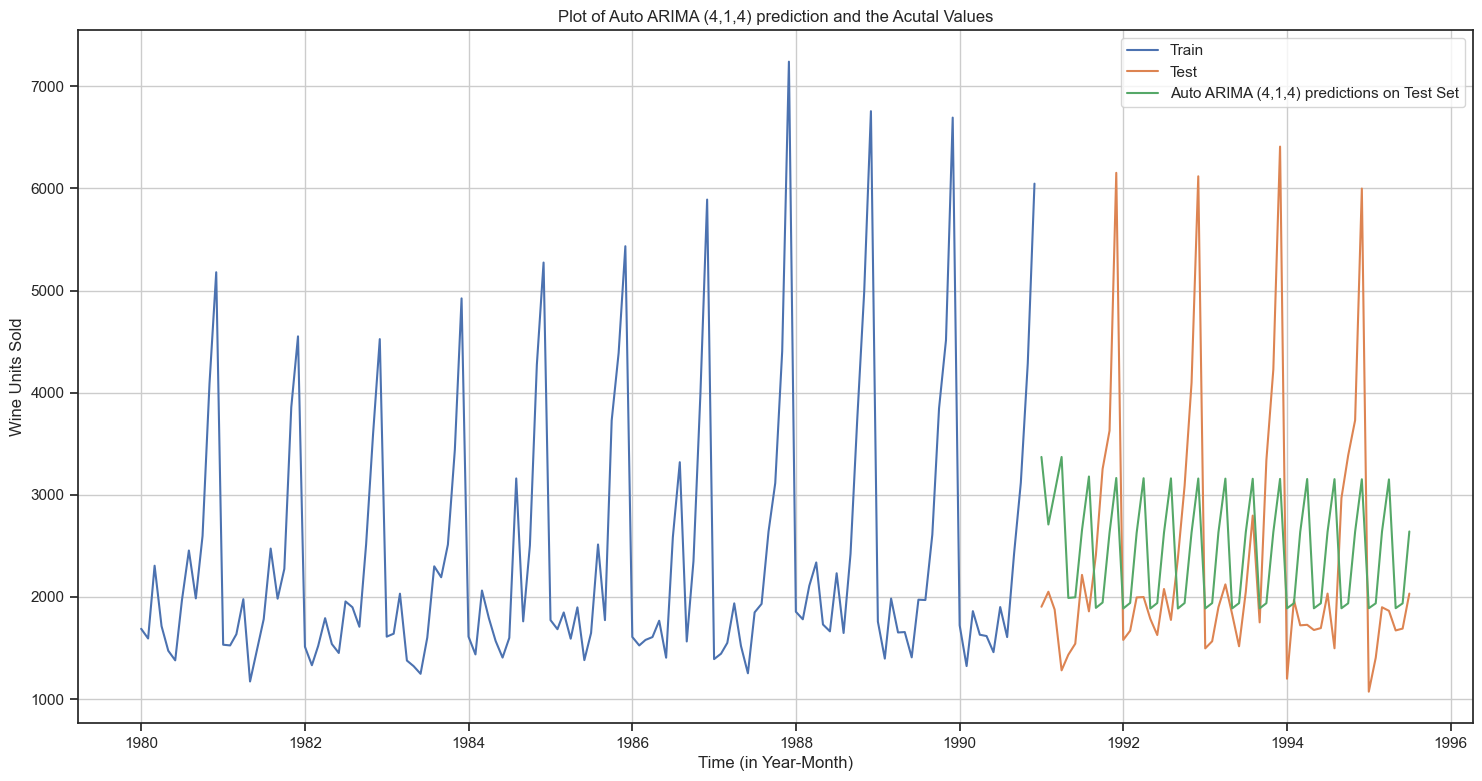

In [106]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (4,1,4) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto ARIMA (4,1,4) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [107]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [108]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1204.8383472856583 
MAPE: 39.56752631150783


In [109]:
resultsDf_2 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto ARIMA (4,1,4)'])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)  1204.838347  39.567526

**SARIMA Model**

In [110]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [111]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [112]:
import statsmodels.api as sm

SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])  # Ensure it's initialized

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(
            train['Sparkling'].values,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print(f'SARIMA{param}x{param_seasonal} - AIC: {results_SARIMA.aic}')
        
        # Use pd.concat instead of append
        new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})
        SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 1956.2614616845315
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC: 1723.1533640234386
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC: 3894.5417710898537
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 1806.9905301389144
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC: 1633.2108735791617
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC: 5318.554358375609
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC: 1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC: 1647.2054158611422
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC: 1630.9898053920879
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC: 2360.2404444572735
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC: 1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC: 1469.1871052625643
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC: 1471.0594530063904
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC: 2130.3566881650577
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 1923.76886495

In [113]:
SARIMA_AIC.sort_values(by=['AIC']).head(20)

param       seasonal          AIC
83   (1, 1, 1)  (0, 0, 3, 12)   921.364113
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497066
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602199
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195899
238  (3, 1, 2)  (3, 0, 2, 12)  1389.701997
254  (3, 1, 3)  (3, 0, 2, 12)  1391.696211
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169864
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677471
206  (3, 1, 0)  (3, 0, 2, 12)  1398.307483
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789897
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437614
190  (2, 1, 3)  (3, 0, 2, 12)  1401.692749
236  (3, 1, 2)  (3, 0, 0, 12)  1401.802237
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467337
157  (2, 1, 1)  (3, 0, 1, 12)  1403.122130
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435931
158  (2, 1, 1)  (3, 0, 2, 12)  1403.824133

In [114]:
#The model is throwing errors with values before (3,1,2)(3,0,1,12). It is therefore due to this reason, we have decided on this parameter combination.

In [115]:
SARIMA_AIC.sort_values(by=['AIC']).iloc[12:,:]

param       seasonal          AIC
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789897
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437614
190  (2, 1, 3)  (3, 0, 2, 12)  1401.692749
236  (3, 1, 2)  (3, 0, 0, 12)  1401.802237
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467337
..         ...            ...          ...
71   (1, 1, 0)  (1, 0, 3, 12)  5406.992390
23   (0, 1, 1)  (1, 0, 3, 12)  5563.753496
119  (1, 1, 3)  (1, 0, 3, 12)  5567.950083
251  (3, 1, 3)  (2, 0, 3, 12)  5682.836073
199  (3, 1, 0)  (1, 0, 3, 12)  5946.483019

[244 rows x 3 columns]

In [116]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 2),
                                seasonal_order=(3, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [1], 12)   Log Likelihood                -684.301
Date:                              Sat, 22 Feb 2025   AIC                           1388.602
Time:                                      18:09:23   BIC                           1413.820
Sample:                                  01-01-1980   HQIC                          1398.780
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5432      0.416     -1.307      0.191      -1.358       0.272
ar.L2         -0.00

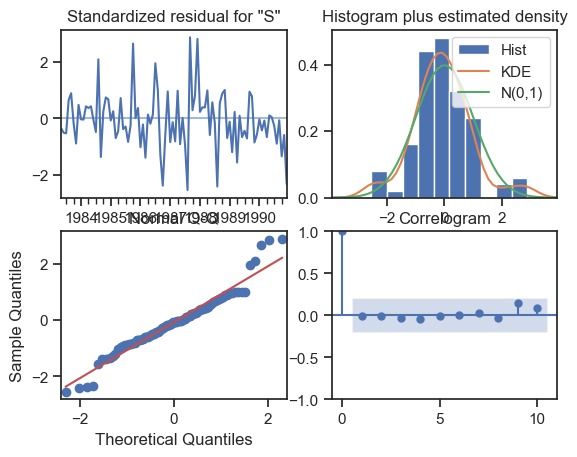

In [117]:
results_auto_SARIMA.plot_diagnostics();
plt.show()

In [118]:
#Predict on the Test Set using this model and evaluate the model.

In [119]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [120]:
predicted_auto_SARIMA.predicted_mean

1991-01-01    1320.405950
1991-02-01    1298.782037
1991-03-01    1604.624492
1991-04-01    1626.360239
1991-05-01    1398.212461
1991-06-01    1237.975990
1991-07-01    1786.182160
1991-08-01    1510.726787
1991-09-01    2286.195486
1991-10-01    3291.077302
1991-11-01    4452.303859
1991-12-01    6491.824023
1992-01-01    1296.283461
1992-02-01    1102.278573
1992-03-01    1546.883365
1992-04-01    1444.346819
1992-05-01    1283.414997
1992-06-01    1095.311889
1992-07-01    1662.794492
1992-08-01    1420.302970
1992-09-01    2215.123020
1992-10-01    3278.263531
1992-11-01    4412.353165
1992-12-01    6549.739602
1993-01-01    1180.980880
1993-02-01     959.726284
1993-03-01    1428.254237
1993-04-01    1311.374781
1993-05-01    1161.063248
1993-06-01     971.762665
1993-07-01    1543.784690
1993-08-01    1276.350990
1993-09-01    2113.595604
1993-10-01    3158.857012
1993-11-01    4359.674837
1993-12-01    6528.376309
1994-01-01    1019.628270
1994-02-01     825.307458
1994-03-01  

Text(0, 0.5, 'Wine Units Sold')

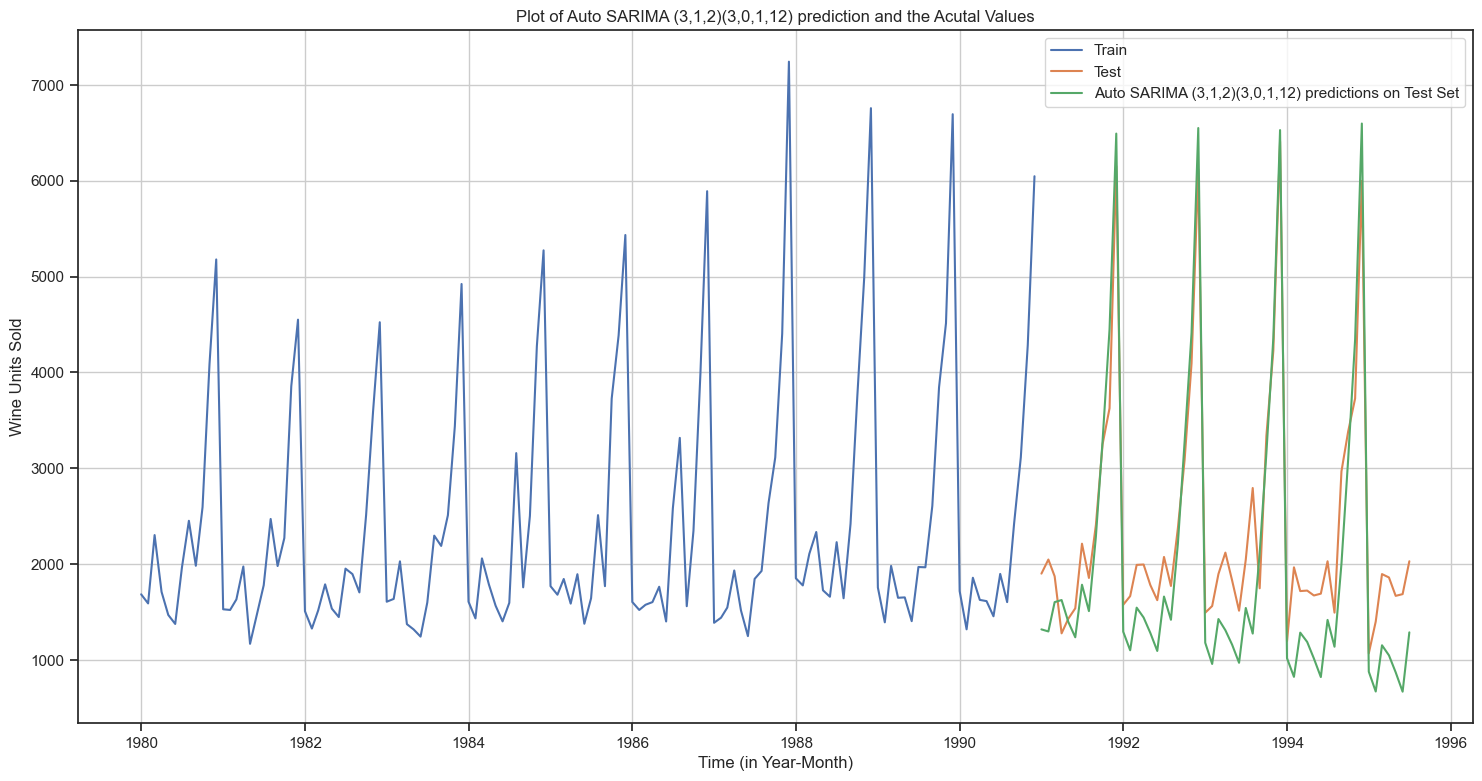

In [121]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,2)(3,0,1,12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (3,1,2)(3,0,1,12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [122]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1320.405950  407.817102     521.099118    2119.712782
1991-02-01  1298.782037  421.112620     473.416468    2124.147607
1991-03-01  1604.624492  421.113020     779.258139    2429.990844
1991-04-01  1626.360239  429.610676     784.338787    2468.381691
1991-05-01  1398.212461  430.075478     555.280013    2241.144909

In [123]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 579.4801135390437 
MAPE: 25.02758730933025


In [124]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto SARIMA (3,1,2)(3,0,1,12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)             1204.838347  39.567526
Auto SARIMA (3,1,2)(3,0,1,12)   579.480114  25.027587

In [133]:
train.index = pd.to_datetime(train.index)  # Ensure datetime index
train = train.asfreq('M')  # Set frequency to monthly

manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))  # Remove 'freq' argument
results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  129
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   0.000
Date:                Sat, 22 Feb 2025   AIC                              2.000
Time:                        18:12:18   BIC                              4.852
Sample:                    02-29-1980   HQIC                             3.159
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Pr

In [134]:
predicted_manual_ARIMA

1990-12-31    0.0
1991-01-31    0.0
1991-02-28    0.0
1991-03-31    0.0
1991-04-30    0.0
1991-05-31    0.0
1991-06-30    0.0
1991-07-31    0.0
1991-08-31    0.0
1991-09-30    0.0
1991-10-31    0.0
1991-11-30    0.0
1991-12-31    0.0
1992-01-31    0.0
1992-02-29    0.0
1992-03-31    0.0
1992-04-30    0.0
1992-05-31    0.0
1992-06-30    0.0
1992-07-31    0.0
1992-08-31    0.0
1992-09-30    0.0
1992-10-31    0.0
1992-11-30    0.0
1992-12-31    0.0
1993-01-31    0.0
1993-02-28    0.0
1993-03-31    0.0
1993-04-30    0.0
1993-05-31    0.0
1993-06-30    0.0
1993-07-31    0.0
1993-08-31    0.0
1993-09-30    0.0
1993-10-31    0.0
1993-11-30    0.0
1993-12-31    0.0
1994-01-31    0.0
1994-02-28    0.0
1994-03-31    0.0
1994-04-30    0.0
1994-05-31    0.0
1994-06-30    0.0
1994-07-31    0.0
1994-08-31    0.0
1994-09-30    0.0
1994-10-31    0.0
1994-11-30    0.0
1994-12-31    0.0
1995-01-31    0.0
1995-02-28    0.0
1995-03-31    0.0
1995-04-30    0.0
1995-05-31    0.0
1995-06-30    0.0
Freq: ME, 

Text(0, 0.5, 'Wine Units Sold')

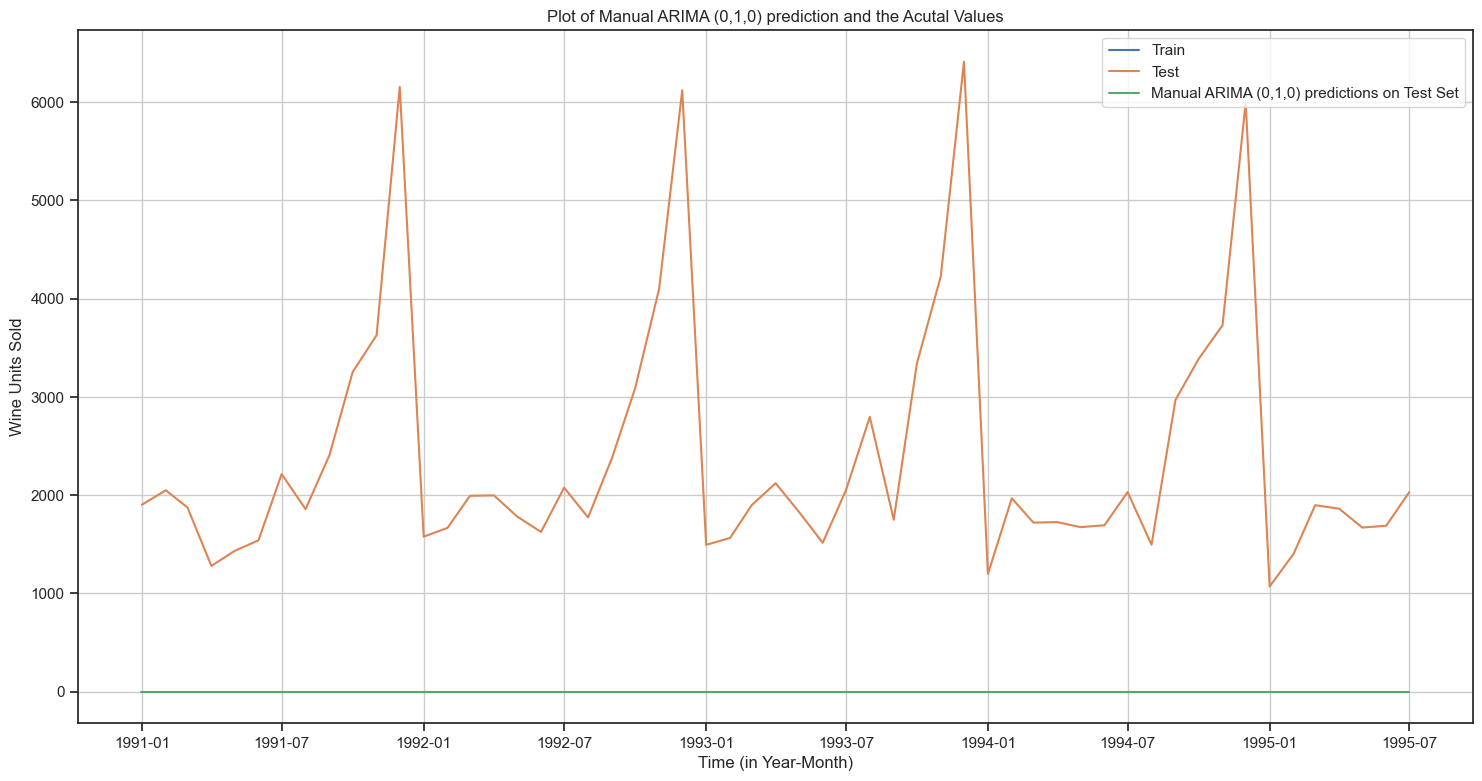

In [136]:


plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (0,1,0) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (0,1,0) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [138]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2716.93044378461 
MAPE: nan


In [139]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                   0.000
Date:                Sat, 22 Feb 2025   AIC                              8.000
Time:                        18:19:29   BIC                             19.408
Sample:                    02-29-1980   HQIC                            12.635
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        n

In [140]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [141]:
predicted_manual_ARIMA

1990-11-30    0.0
1990-12-31    0.0
1991-01-31    0.0
1991-02-28    0.0
1991-03-31    0.0
1991-04-30    0.0
1991-05-31    0.0
1991-06-30    0.0
1991-07-31    0.0
1991-08-31    0.0
1991-09-30    0.0
1991-10-31    0.0
1991-11-30    0.0
1991-12-31    0.0
1992-01-31    0.0
1992-02-29    0.0
1992-03-31    0.0
1992-04-30    0.0
1992-05-31    0.0
1992-06-30    0.0
1992-07-31    0.0
1992-08-31    0.0
1992-09-30    0.0
1992-10-31    0.0
1992-11-30    0.0
1992-12-31    0.0
1993-01-31    0.0
1993-02-28    0.0
1993-03-31    0.0
1993-04-30    0.0
1993-05-31    0.0
1993-06-30    0.0
1993-07-31    0.0
1993-08-31    0.0
1993-09-30    0.0
1993-10-31    0.0
1993-11-30    0.0
1993-12-31    0.0
1994-01-31    0.0
1994-02-28    0.0
1994-03-31    0.0
1994-04-30    0.0
1994-05-31    0.0
1994-06-30    0.0
1994-07-31    0.0
1994-08-31    0.0
1994-09-30    0.0
1994-10-31    0.0
1994-11-30    0.0
1994-12-31    0.0
1995-01-31    0.0
1995-02-28    0.0
1995-03-31    0.0
1995-04-30    0.0
1995-05-31    0.0
Freq: ME, 

Text(0, 0.5, 'Wine Units Sold')

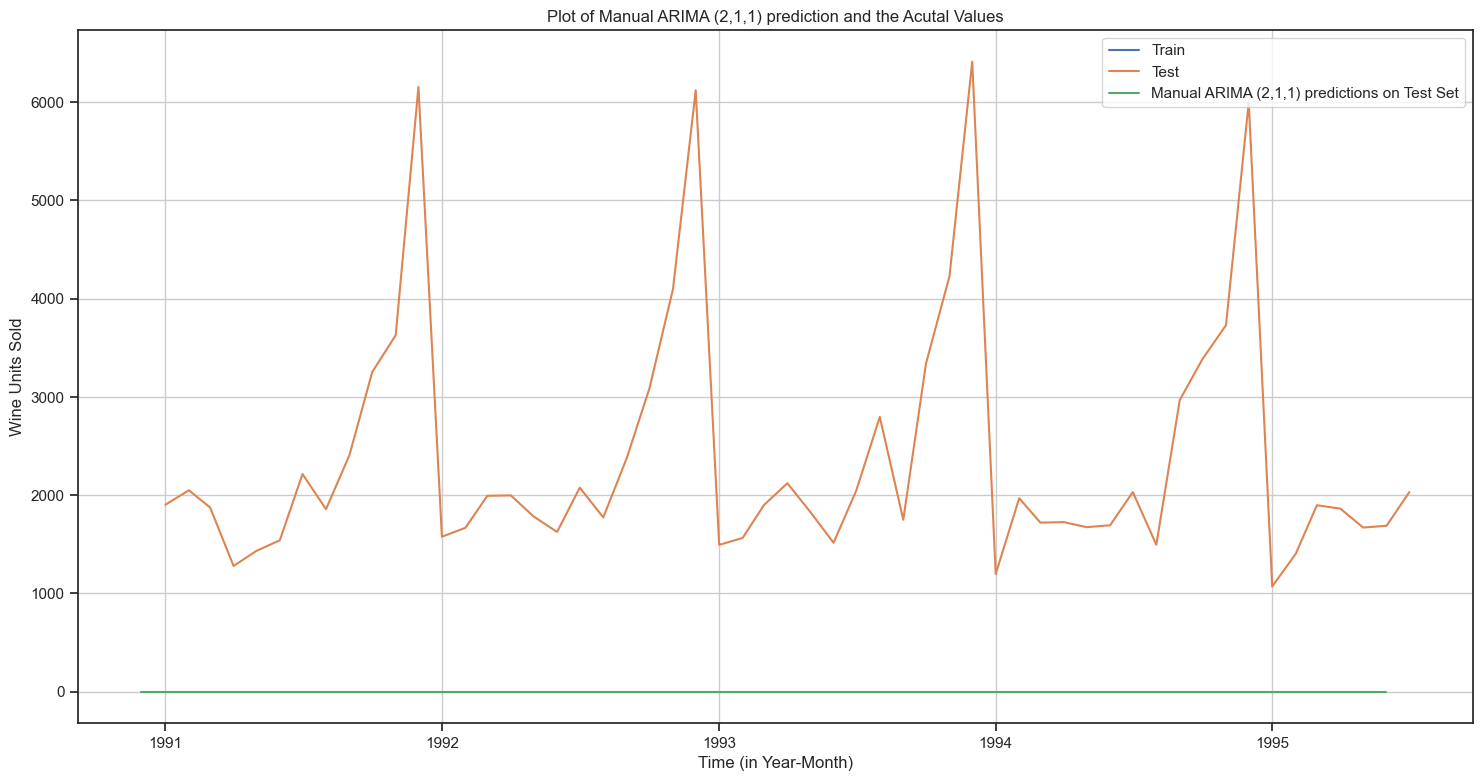

In [143]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,1) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,1) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [145]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2716.93044378461 
MAPE: nan


In [146]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual ARIMA (2,1,1)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)             1204.838347  39.567526
Auto SARIMA (3,1,2)(3,0,1,12)   579.480114  25.027587
Manual ARIMA (2,1,1)           2716.930444        NaN

**Manual-Arima Results**

Text(0, 0.5, 'Units Sold')

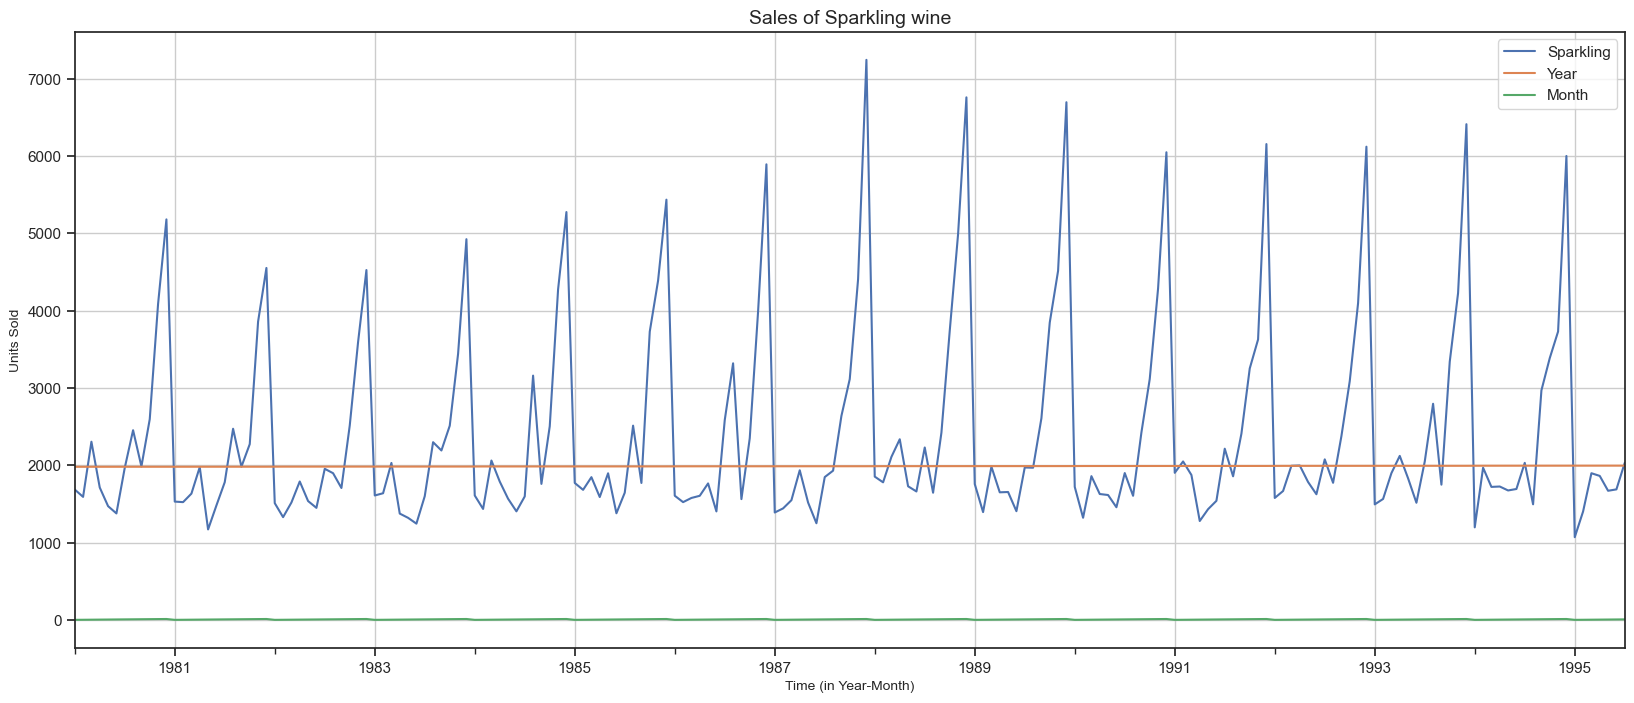

In [154]:
#Original Time Series
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Sparkling wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Units Sold',fontsize=10)


Text(0, 0.5, 'Wine Units Sold')

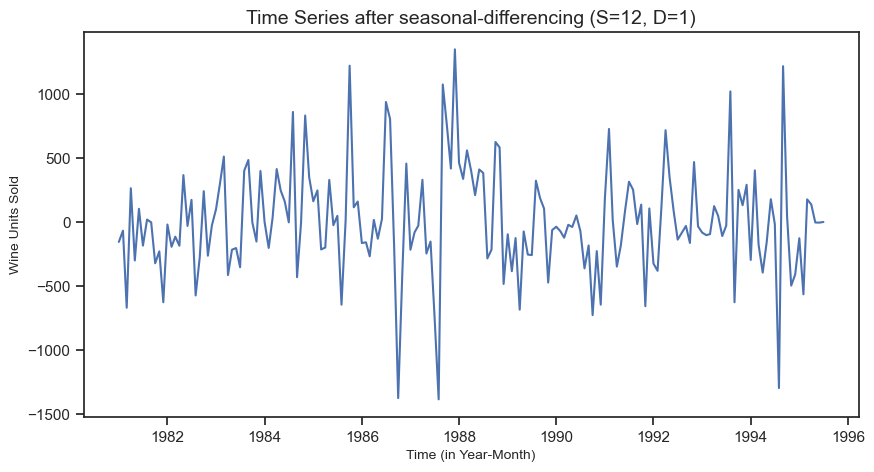

In [156]:
#Time series with seasonal differencing (S=12, D=1)
plt.figure(figsize=(10,5))
plt.plot(df['Sparkling'].diff(12).dropna())
plt.title ('Time Series after seasonal-differencing (S=12, D=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

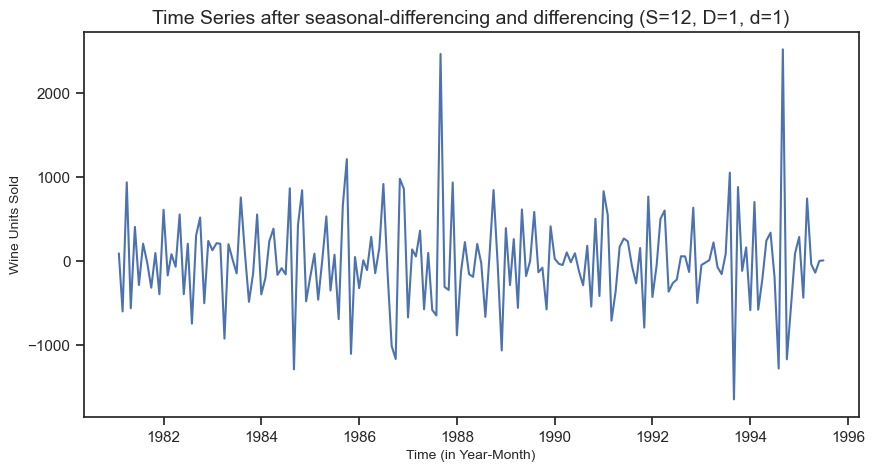

In [157]:
#Time series with seasonal differencing followed by normal differencing (S=12, D=1, d=1)
plt.figure(figsize=(10,5))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna())
plt.title ('Time Series after seasonal-differencing and differencing (S=12, D=1, d=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

In [158]:
#Testing stationarity
dftest = adfuller((df['Sparkling'].diff(12).dropna()).diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -5.121
DF test p-value is 0.00012316304915679433
Number of lags used 11


In [159]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  129
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                   0.000
Date:                              Sat, 22 Feb 2025   AIC                             16.000
Time:                                      18:33:19   BIC                             36.921
Sample:                                  02-29-1980   HQIC                            24.469
                                       - 10-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ar.L2              

In [160]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [161]:
predicted_manual_SARIMA.predicted_mean

1990-11-30    0.0
1990-12-31    0.0
1991-01-31    0.0
1991-02-28    0.0
1991-03-31    0.0
1991-04-30    0.0
1991-05-31    0.0
1991-06-30    0.0
1991-07-31    0.0
1991-08-31    0.0
1991-09-30    0.0
1991-10-31    0.0
1991-11-30    0.0
1991-12-31    0.0
1992-01-31    0.0
1992-02-29    0.0
1992-03-31    0.0
1992-04-30    0.0
1992-05-31    0.0
1992-06-30    0.0
1992-07-31    0.0
1992-08-31    0.0
1992-09-30    0.0
1992-10-31    0.0
1992-11-30    0.0
1992-12-31    0.0
1993-01-31    0.0
1993-02-28    0.0
1993-03-31    0.0
1993-04-30    0.0
1993-05-31    0.0
1993-06-30    0.0
1993-07-31    0.0
1993-08-31    0.0
1993-09-30    0.0
1993-10-31    0.0
1993-11-30    0.0
1993-12-31    0.0
1994-01-31    0.0
1994-02-28    0.0
1994-03-31    0.0
1994-04-30    0.0
1994-05-31    0.0
1994-06-30    0.0
1994-07-31    0.0
1994-08-31    0.0
1994-09-30    0.0
1994-10-31    0.0
1994-11-30    0.0
1994-12-31    0.0
1995-01-31    0.0
1995-02-28    0.0
1995-03-31    0.0
1995-04-30    0.0
1995-05-31    0.0
Freq: ME, 

Text(0, 0.5, 'Wine Units Sold')

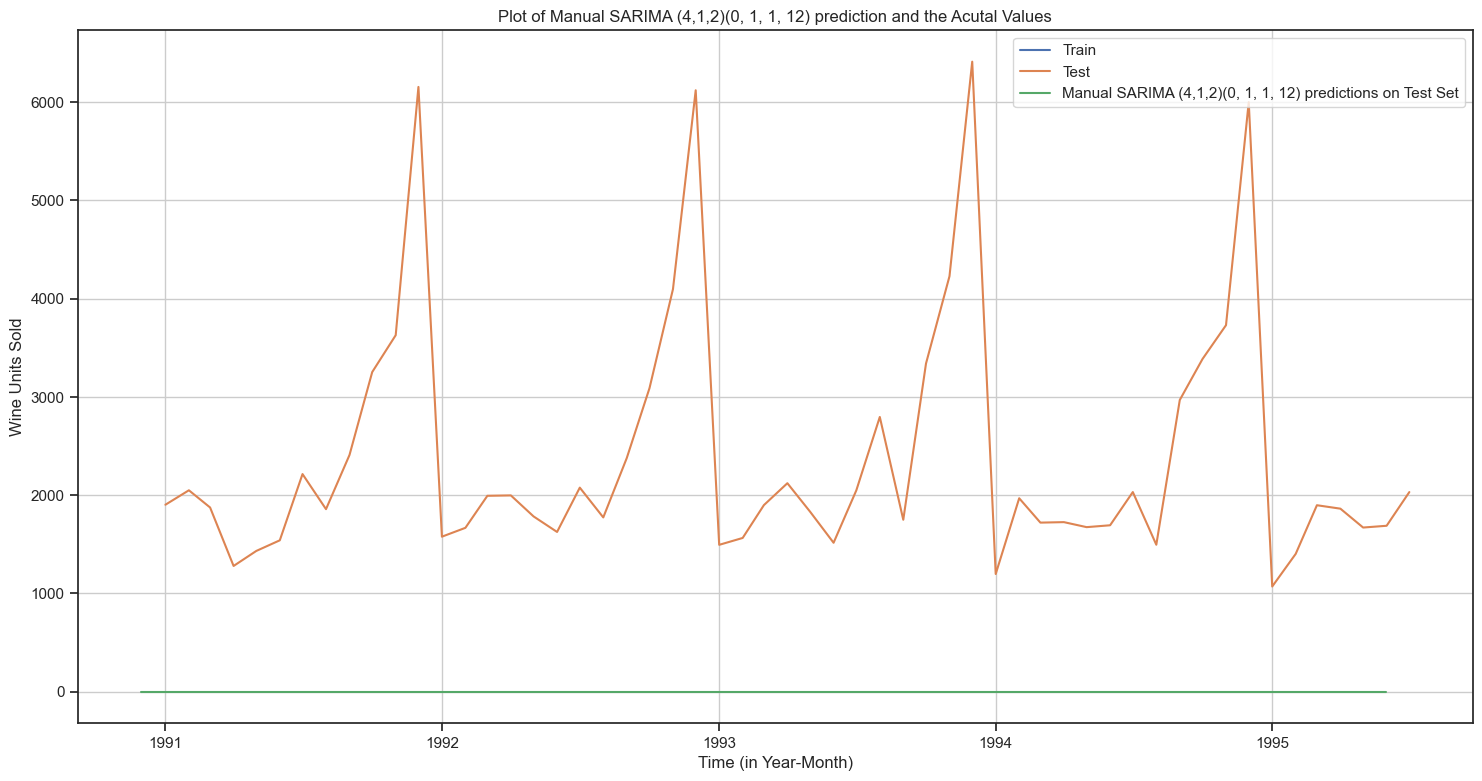

In [162]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (4,1,2)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [165]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2716.93044378461 
MAPE: nan


In [166]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)                    1204.838347  39.567526
Auto SARIMA (3,1,2)(3,0,1,12)          579.480114  25.027587
Manual ARIMA (2,1,1)                  2716.930444        NaN
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)  2716.930444        NaN

Text(0, 0.5, 'Wine Units Sold')

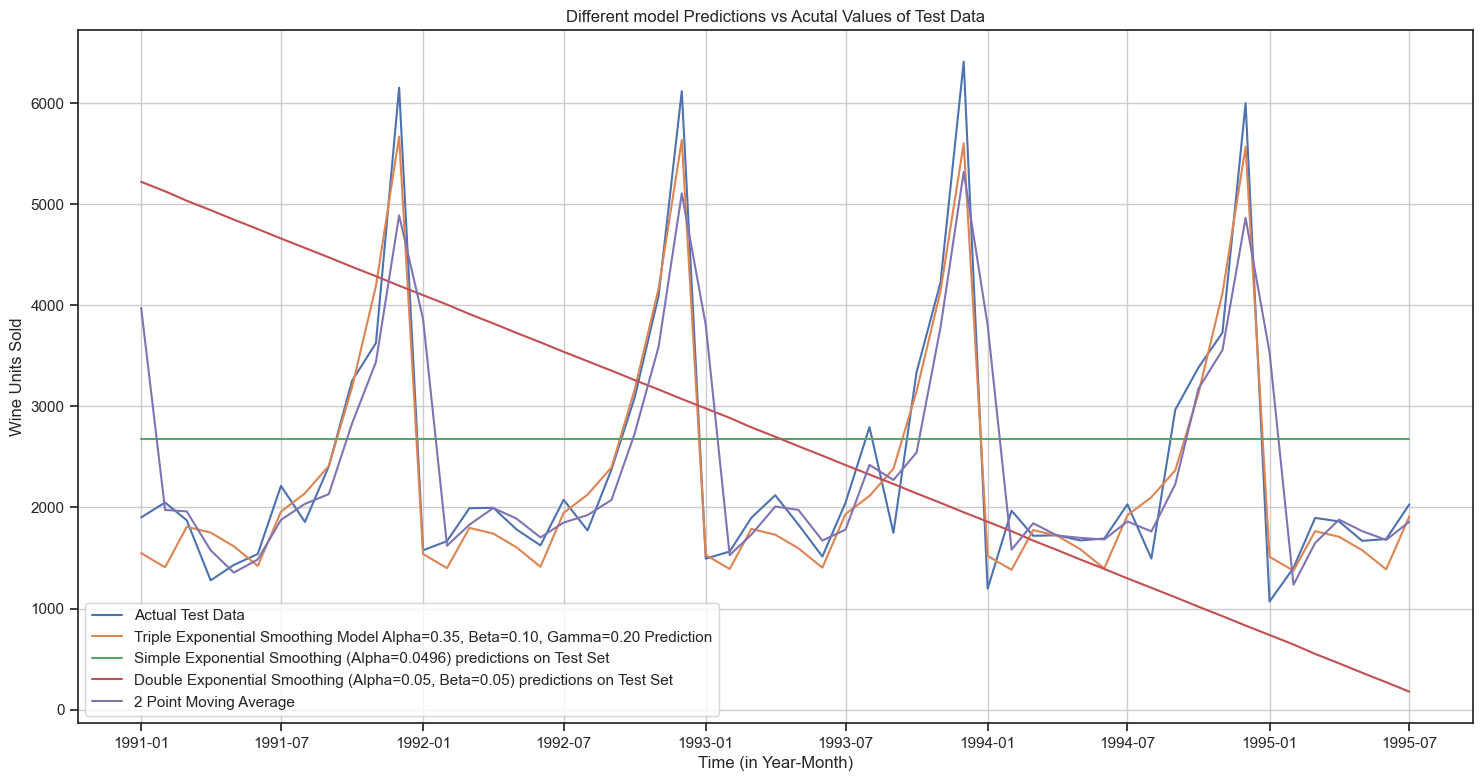

In [168]:
## Plotting on training data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Triple Exponential Smoothing Model Alpha=0.35, Beta=0.10, Gamma=0.20 Prediction')

plt.plot(SES_test['predict'], label='Simple Exponential Smoothing (Alpha=0.0496) predictions on Test Set')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=0.05, Beta=0.05) predictions on Test Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average')

plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

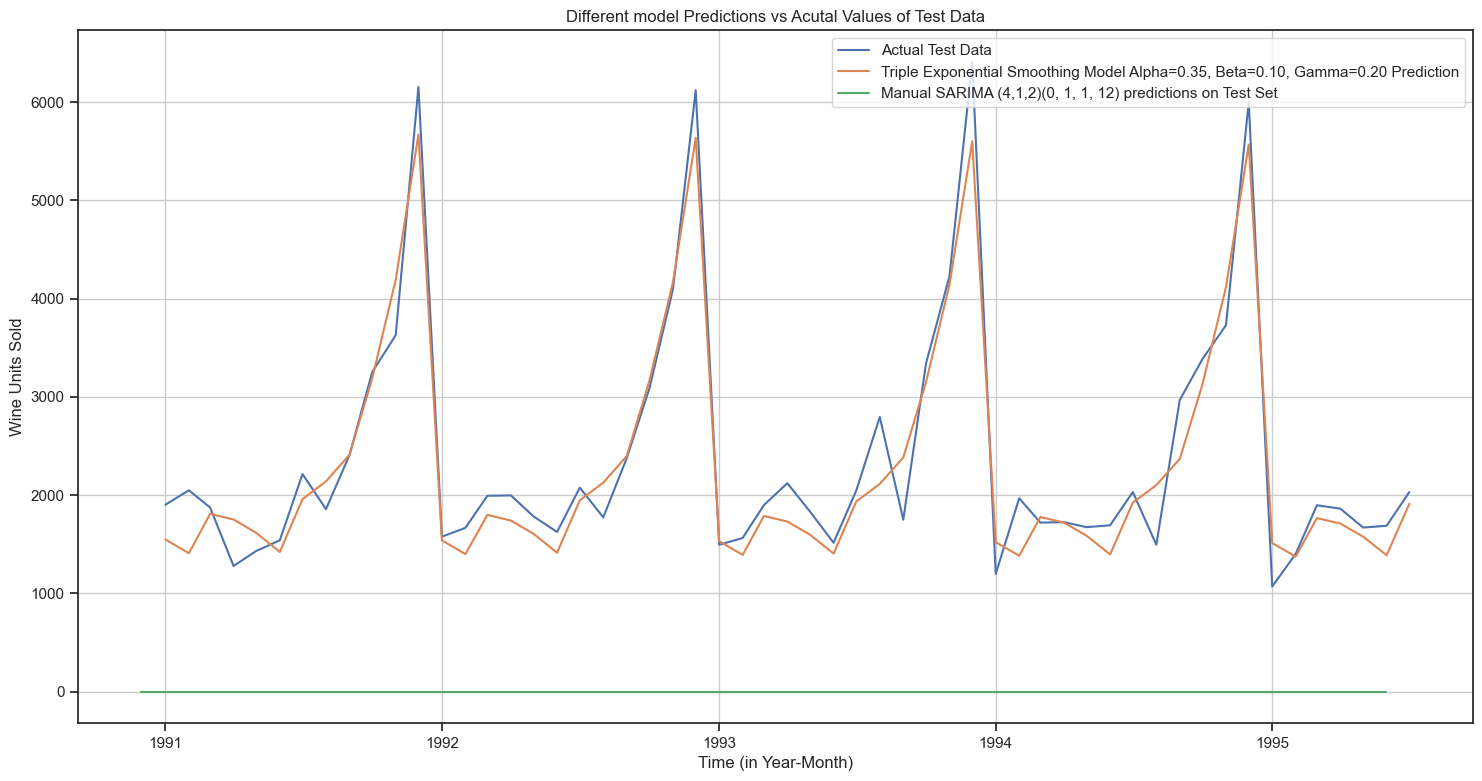

In [169]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Triple Exponential Smoothing Model Alpha=0.35, Beta=0.10, Gamma=0.20 Prediction')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

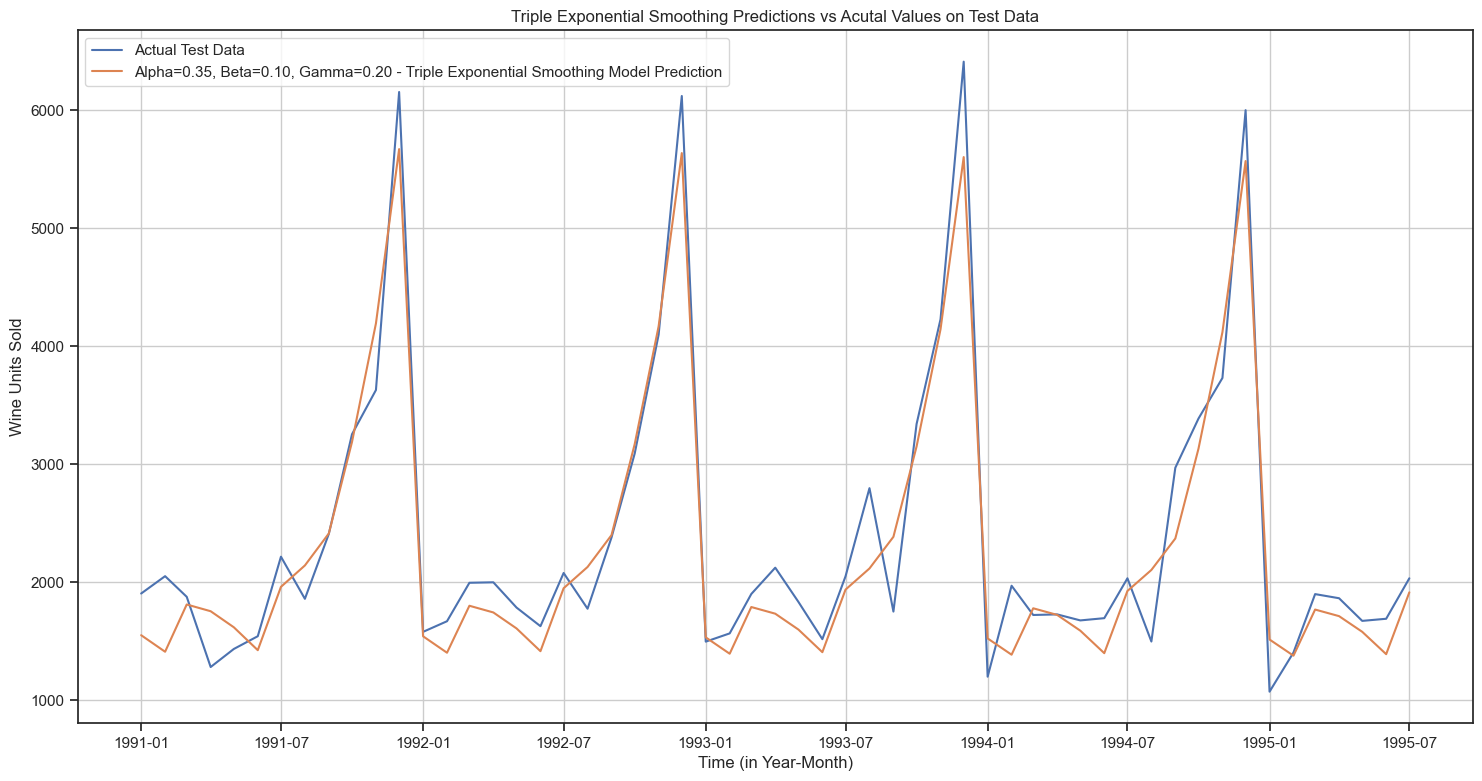

In [170]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35, Beta=0.10, Gamma=0.20 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

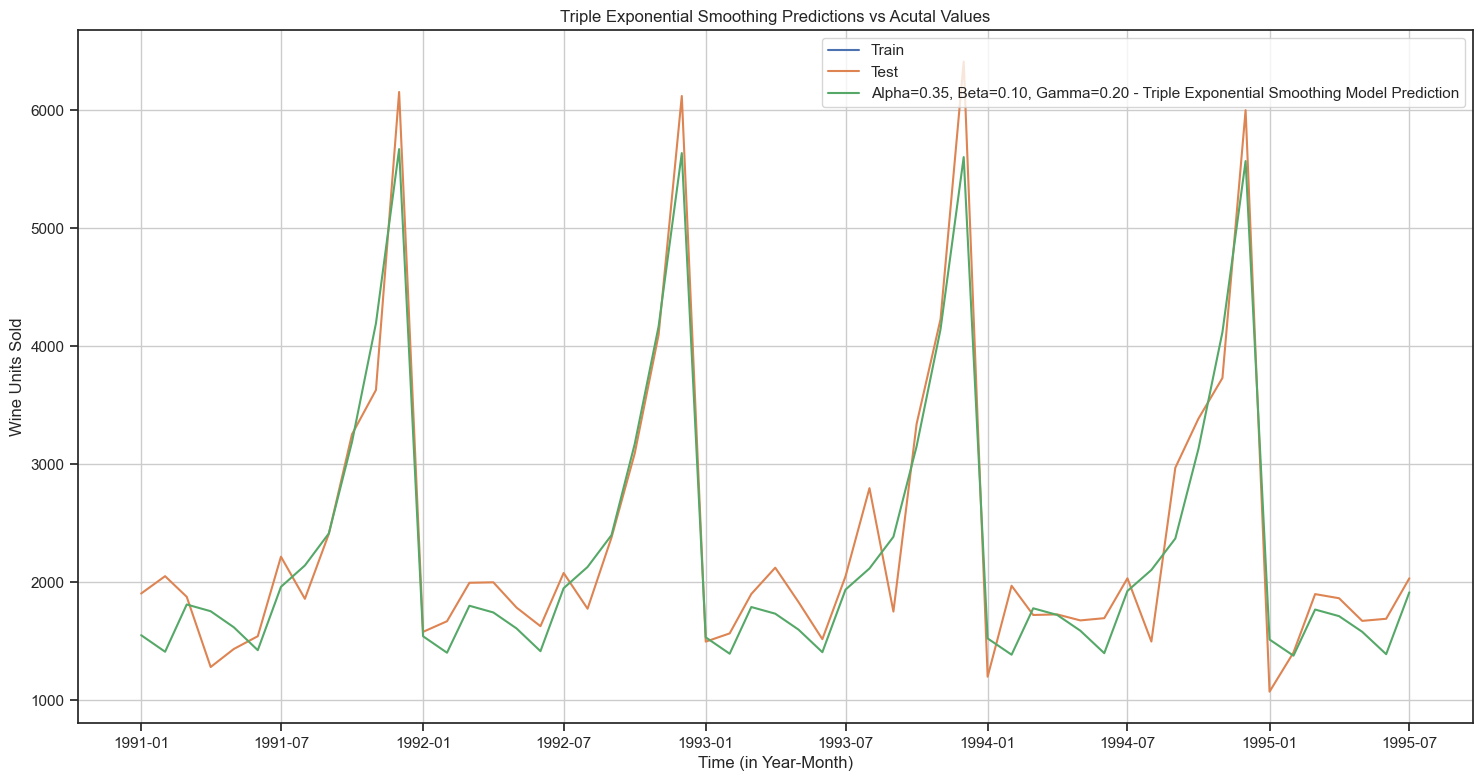

In [171]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35, Beta=0.10, Gamma=0.20 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [173]:
TES_Fullmodel = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS').fit(smoothing_level=0.35, smoothing_trend=0.10, smoothing_seasonal=0.20)

In [174]:
TES_Fullmodel.params

{'smoothing_level': 0.35,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.2,
 'damping_trend': nan,
 'initial_level': 2343.4099762410588,
 'initial_trend': -22.843024706892898,
 'initial_seasons': array([0.83746074, 0.81898123, 1.05630722, 0.95724093, 0.82042214,
        0.79193374, 1.07584007, 1.39979114, 1.18824906, 1.68326653,
        2.40308199, 3.18989688]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [175]:
RMSE_fullmodel = metrics.mean_squared_error(df['Sparkling'],TES_Fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 373.26457572243464


In [176]:
# Getting the predictions for the 12 months into the future
prediction = TES_Fullmodel.forecast(steps=12)
print('Forecast of next 12 months')
prediction.tail(12)

Forecast of next 12 months


1995-08-01    2042.700718
1995-09-01    2522.885524
1995-10-01    3359.409455
1995-11-01    4237.493058
1995-12-01    6490.354595
1996-01-01    1541.185051
1996-02-01    1805.865401
1996-03-01    2056.419919
1996-04-01    1987.423545
1996-05-01    1803.091815
1996-06-01    1681.705284
1996-07-01    2134.377579
Freq: MS, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1800x900 with 0 Axes>

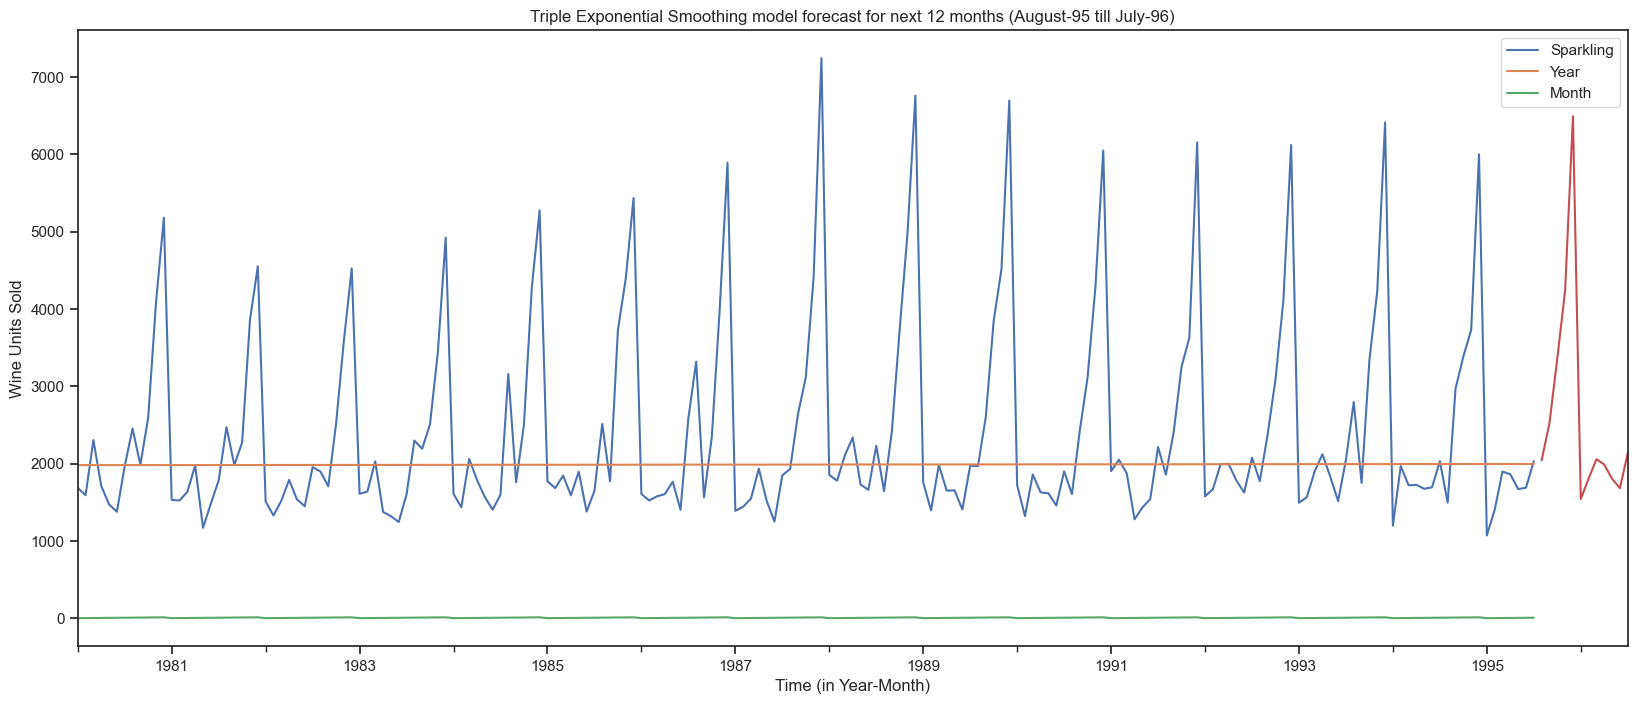

In [177]:
plt.figure(figsize=(18,9))
df.plot()
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [178]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
predicted_df = pd.DataFrame({'lower_ci':prediction - (1.96*np.std(TES_Fullmodel.resid,ddof=1)),
                          'prediction':prediction,
                          'upper_ci': prediction + (1.96*np.std(TES_Fullmodel.resid,ddof=1))})
predicted_df.head(12)

lower_ci   prediction     upper_ci
1995-08-01  1309.138175  2042.700718  2776.263260
1995-09-01  1789.322982  2522.885524  3256.448067
1995-10-01  2625.846913  3359.409455  4092.971998
1995-11-01  3503.930516  4237.493058  4971.055601
1995-12-01  5756.792053  6490.354595  7223.917138
1996-01-01   807.622508  1541.185051  2274.747593
1996-02-01  1072.302859  1805.865401  2539.427944
1996-03-01  1322.857376  2056.419919  2789.982461
1996-04-01  1253.861003  1987.423545  2720.986088
1996-05-01  1069.529273  1803.091815  2536.654358
1996-06-01   948.142741  1681.705284  2415.267826
1996-07-01  1400.815036  2134.377579  2867.940121

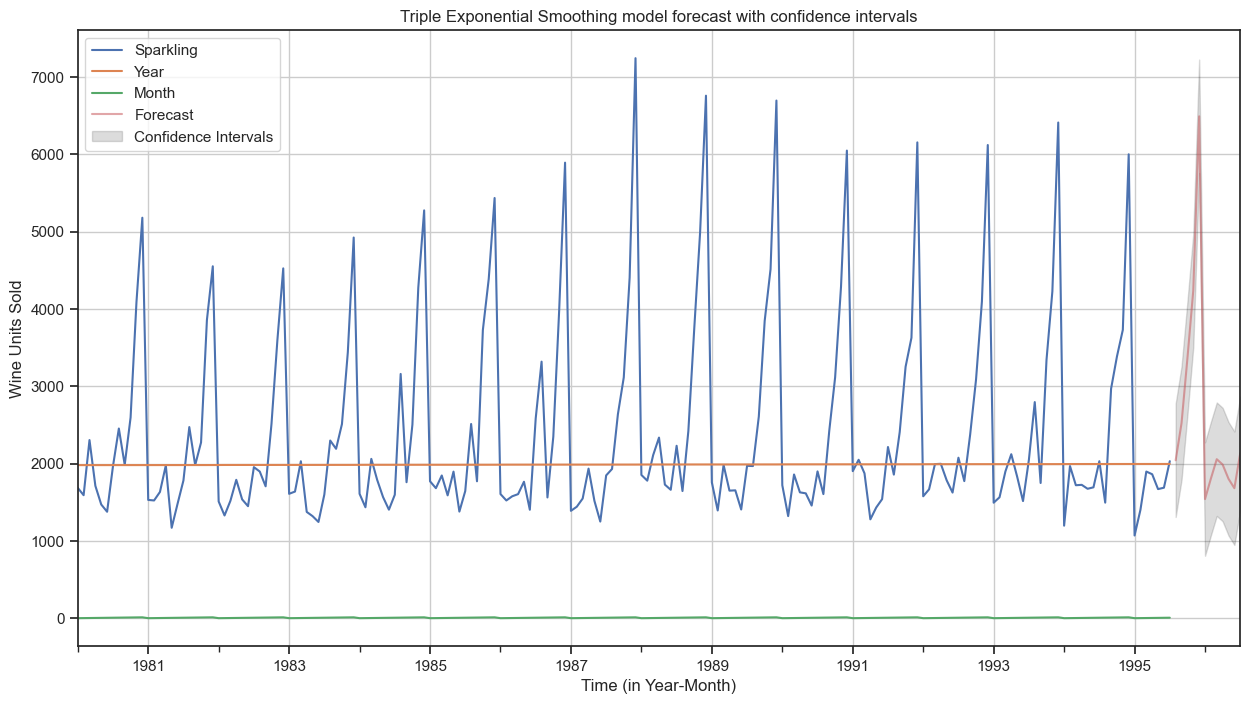

In [179]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15,label='Confidence Intervals')
plt.title('Triple Exponential Smoothing model forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

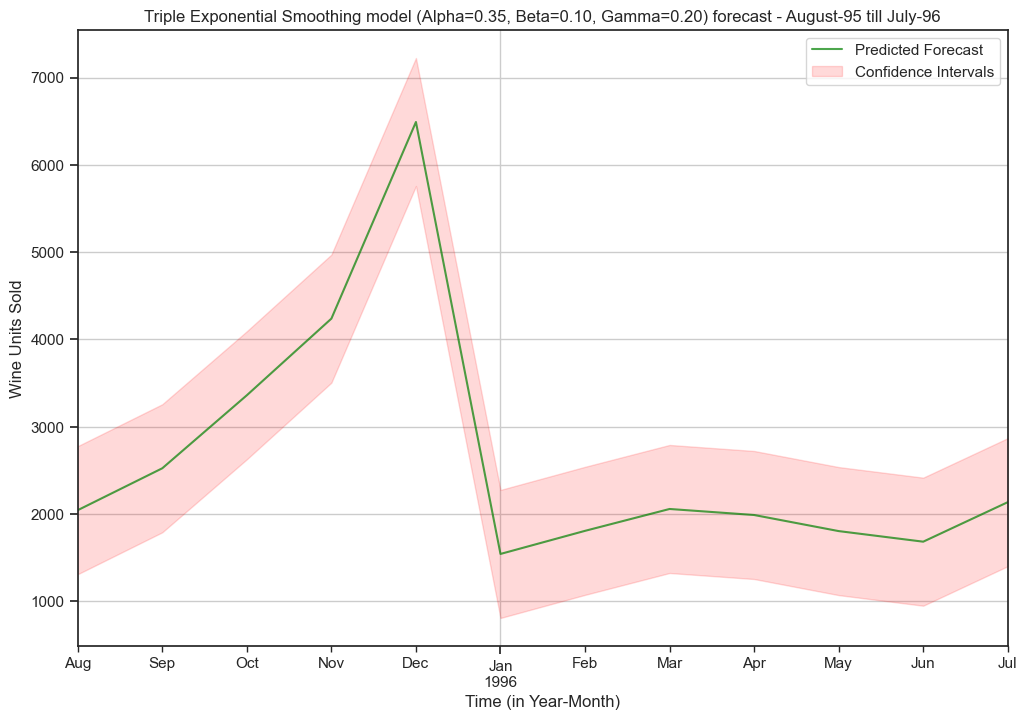

In [180]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.35, Beta=0.10, Gamma=0.20) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

In [181]:
#Optimum Model - Manual SARIMA Model (4, 1, 2)(0, 1, 1, 12)

Text(0, 0.5, 'Wine Units Sold')

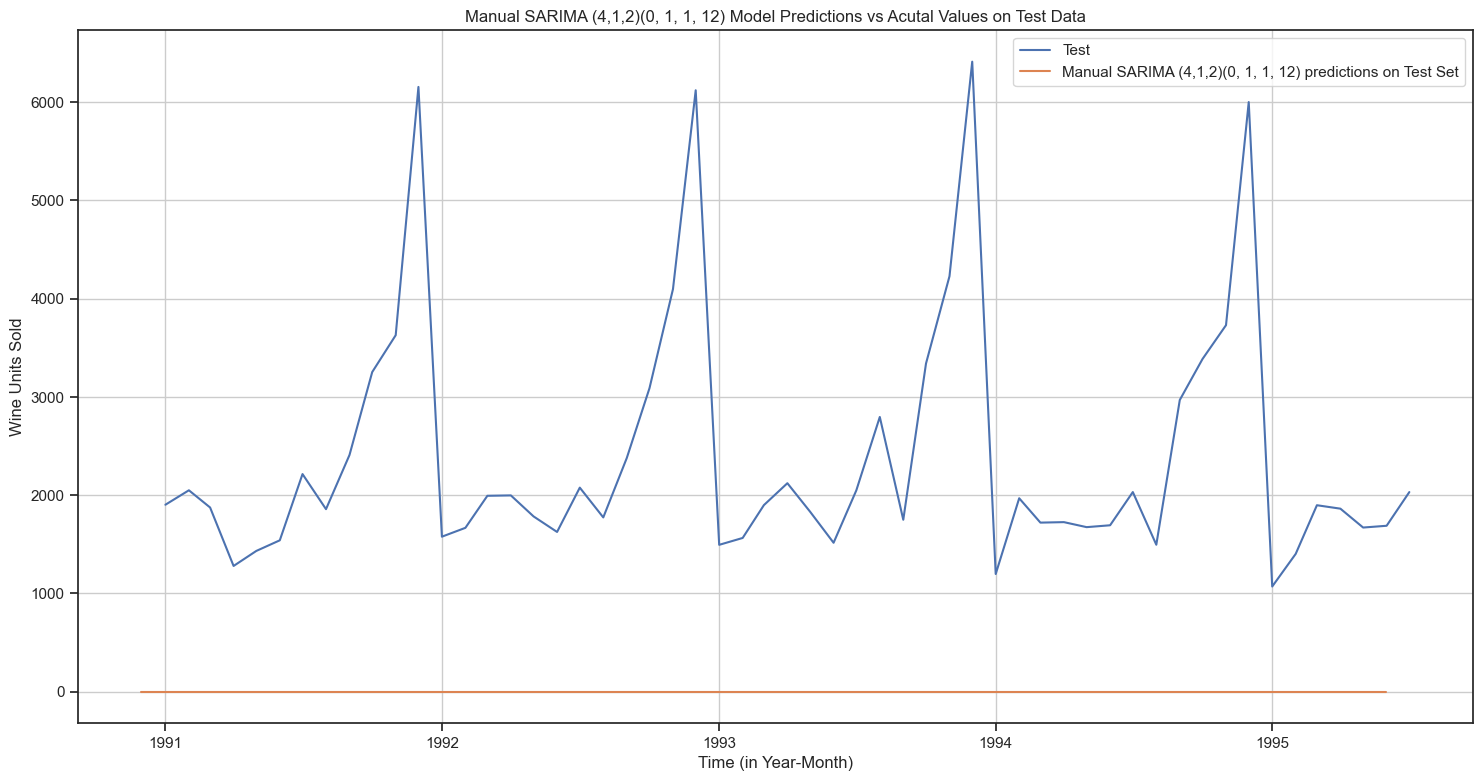

In [182]:
## Plotting on Test data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

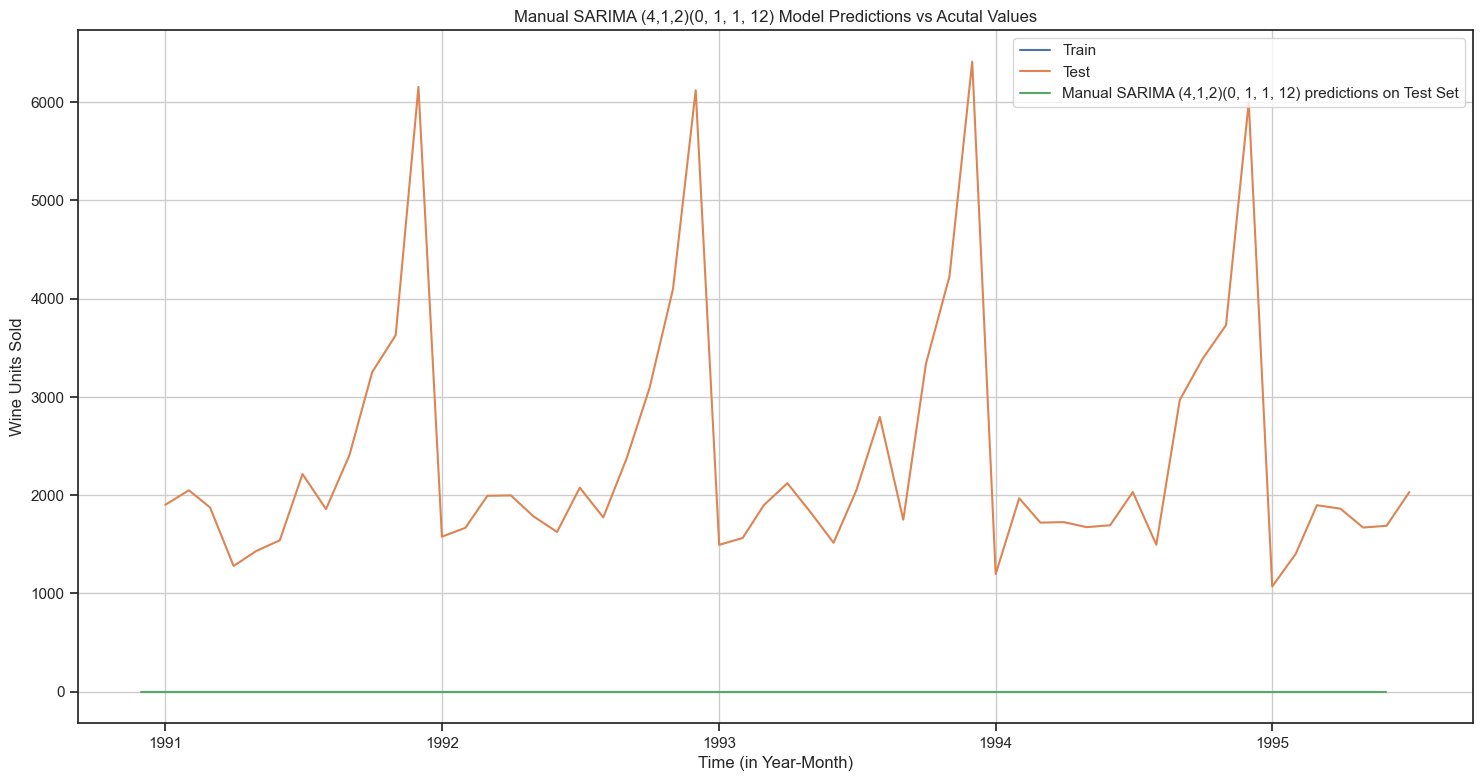

In [183]:

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [184]:
Manual_Sarima_FullModel = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order= (4, 1, 2), 
                                seasonal_order= (0, 1, 1, 12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_fullmodel_manual_sarima = Manual_Sarima_FullModel.fit(maxiter=1000)
print(results_fullmodel_manual_sarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1171.945
Date:                              Sat, 22 Feb 2025   AIC                           2359.889
Time:                                      18:51:37   BIC                           2384.441
Sample:                                  01-01-1980   HQIC                          2369.859
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6275      0.517      1.213      0.225      -0.386       1.641
ar.L2         -0.15

In [185]:
predicted_manual_sarima_full_data = results_fullmodel_manual_sarima.get_forecast(steps=12)
predicted_manual_sarima_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1850.816040  381.838234    1102.426852    2599.205227
1995-09-01  2396.196361  387.330759    1637.042022    3155.350699
1995-10-01  3227.083661  387.331876    2467.927134    3986.240188
1995-11-01  3898.042208  389.054062    3135.510260    4660.574157
1995-12-01  6099.973076  389.124176    5337.303705    6862.642447

In [186]:
predicted_manual_sarima_df = predicted_manual_sarima_full_data.summary_frame(alpha=0.05)
predicted_manual_sarima_df

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1850.816040  381.838234    1102.426852    2599.205227
1995-09-01  2396.196361  387.330759    1637.042022    3155.350699
1995-10-01  3227.083661  387.331876    2467.927134    3986.240188
1995-11-01  3898.042208  389.054062    3135.510260    4660.574157
1995-12-01  6099.973076  389.124176    5337.303705    6862.642447
1996-01-01  1231.641977  389.124178     468.972603    1994.311351
1996-02-01  1559.208915  389.811529     795.192357    2323.225473
1996-03-01  1801.347914  390.841039    1035.313553    2567.382274
1996-04-01  1780.038127  392.386356    1010.975002    2549.101252
1996-05-01  1627.831098  394.277304     855.061782    2400.600414
1996-06-01  1570.335949  396.011458     794.167753    2346.504145
1996-07-01  1979.251205  397.569930    1200.028460    2758.473950

In [187]:
rmse_manual_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_fullmodel_manual_sarima.fittedvalues,squared=False)

rmse_manual_sarima_full

577.5088003012346

In [188]:
# Getting the predictions for the 12 months into the future
prediction_manual_sarima_full = results_fullmodel_manual_sarima.forecast(steps=12)
prediction_manual_sarima_full.tail(12)

1995-08-01    1850.816040
1995-09-01    2396.196361
1995-10-01    3227.083661
1995-11-01    3898.042208
1995-12-01    6099.973076
1996-01-01    1231.641977
1996-02-01    1559.208915
1996-03-01    1801.347914
1996-04-01    1780.038127
1996-05-01    1627.831098
1996-06-01    1570.335949
1996-07-01    1979.251205
Freq: MS, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1800x900 with 0 Axes>

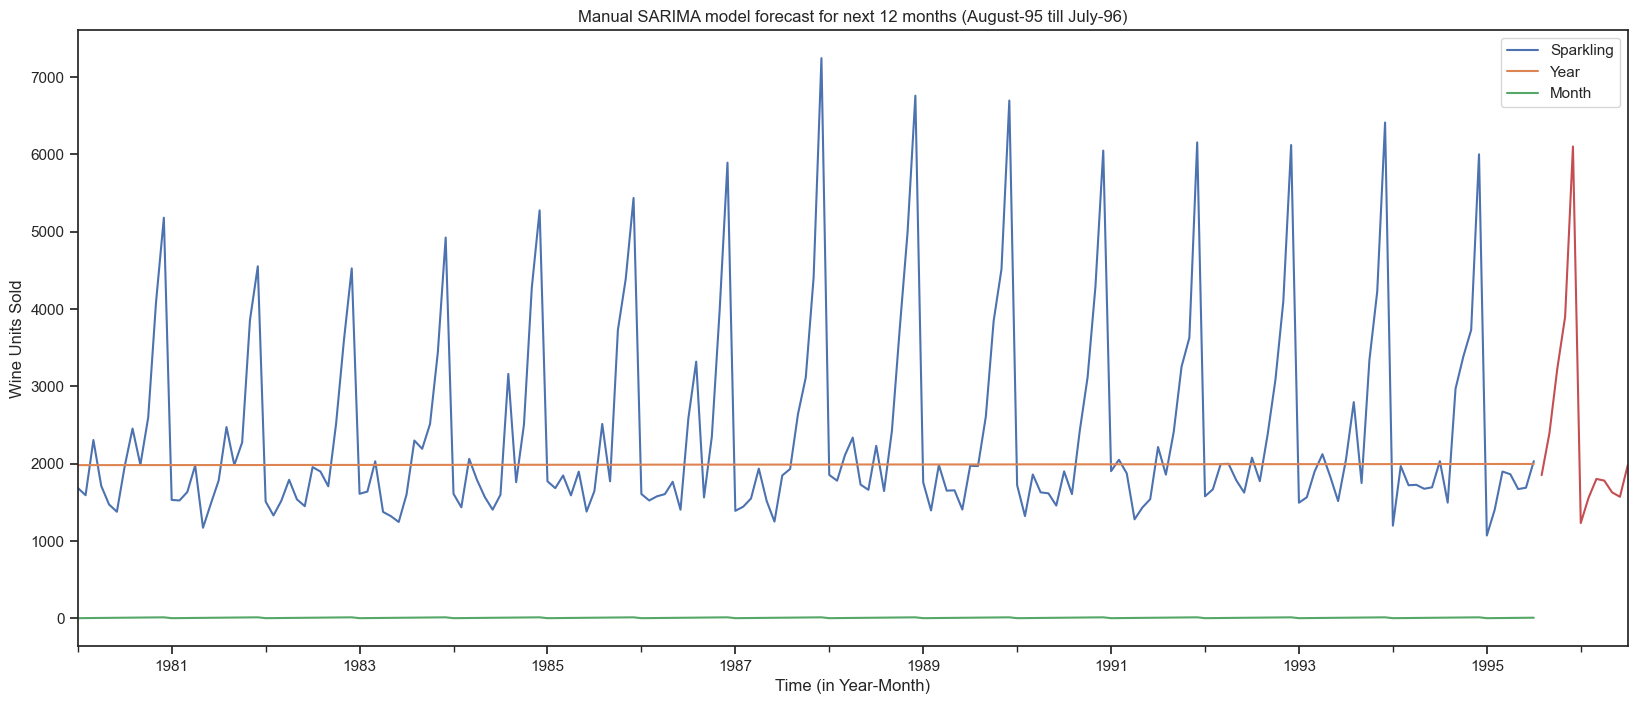

In [189]:
plt.figure(figsize=(18,9))
df.plot()
prediction_manual_sarima_full.plot();
plt.title('Manual SARIMA model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

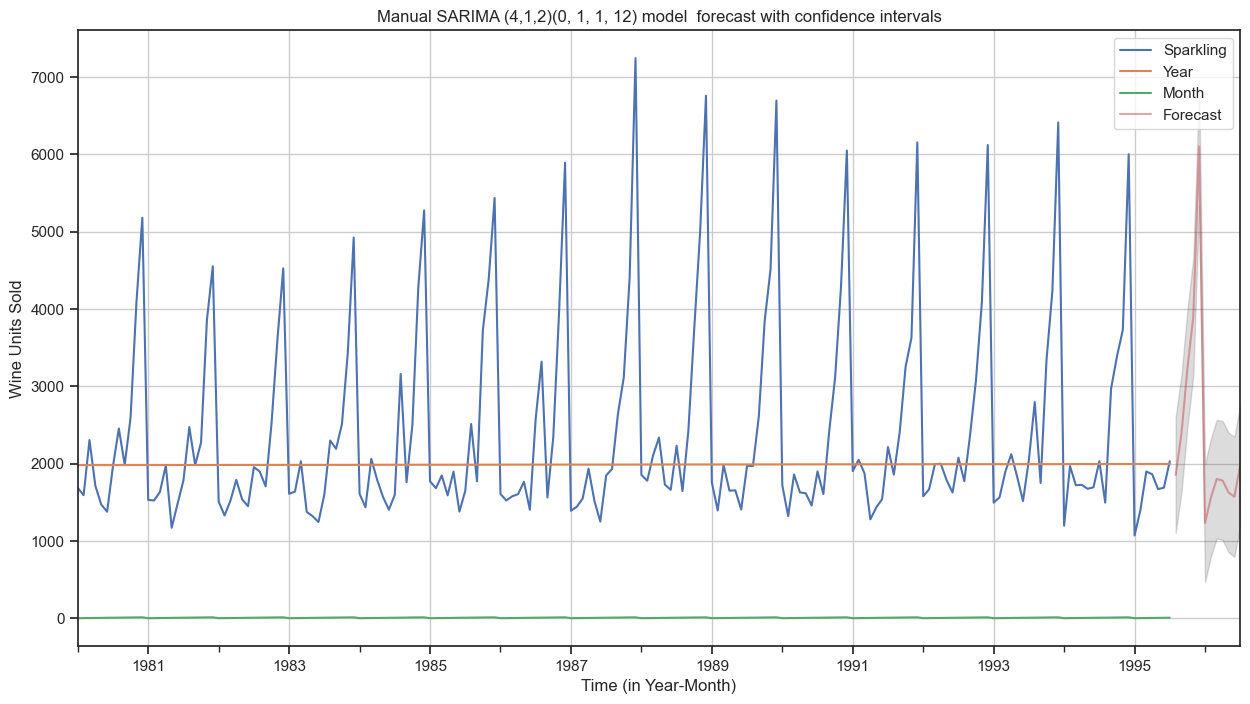

In [190]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_manual_sarima_df['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='k', alpha=.15)
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model  forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

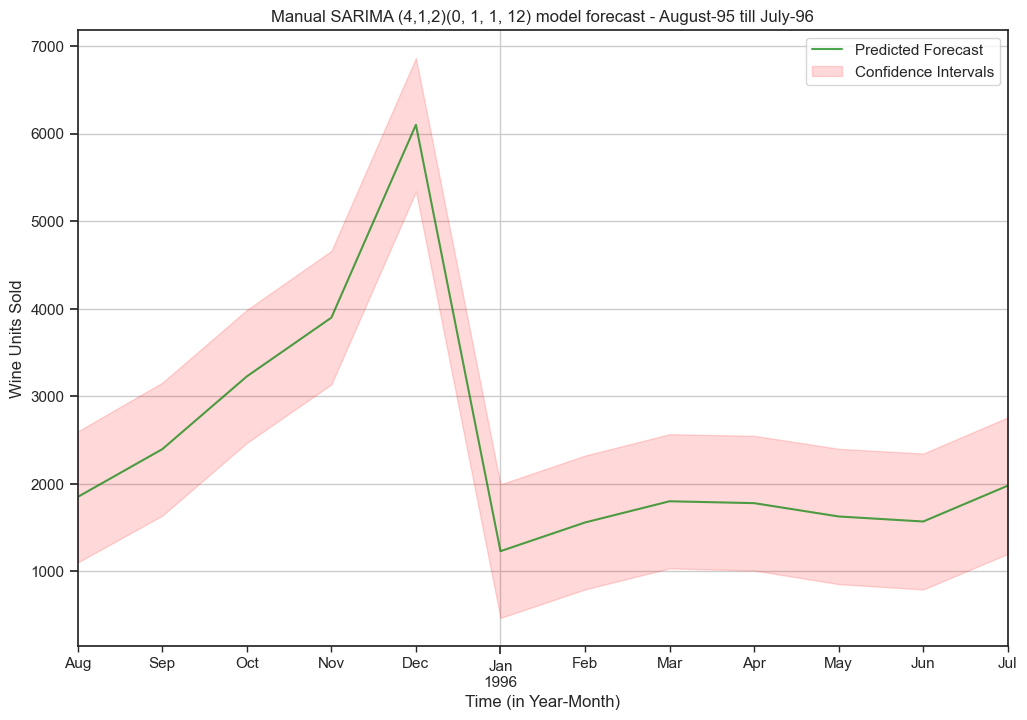

In [191]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = predicted_manual_sarima_df['mean'].plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

In [192]:
TES_Fullmodel.forecast(steps=12)

1995-08-01    2042.700718
1995-09-01    2522.885524
1995-10-01    3359.409455
1995-11-01    4237.493058
1995-12-01    6490.354595
1996-01-01    1541.185051
1996-02-01    1805.865401
1996-03-01    2056.419919
1996-04-01    1987.423545
1996-05-01    1803.091815
1996-06-01    1681.705284
1996-07-01    2134.377579
Freq: MS, dtype: float64

In [193]:
TES_Fullmodel.forecast(steps=12).describe()

count      12.000000
mean     2638.575995
std      1439.987914
min      1541.185051
25%      1805.172005
50%      2049.560318
75%      2732.016507
max      6490.354595
dtype: float64

In [194]:
#Calculating the percentage of sales in the last 4 months
(2527+3363+4240+6487)/TES_Fullmodel.forecast(steps=12).sum()

0.5248095951939136